# Kaggle Study 6일차(porto)

코드출처 : https://www.kaggle.com/bertcarremans/data-preparation-exploration

- 이 노트북은 PorteSeguro 경쟁에서 데이터를 정확하게 파악하는 것을 목표로 합니다. 
- 그 외에도, 모델링을 위해 데이터를 준비할 수 있는 몇 가지 팁과 요령을 제공합니다. 
- 노트북은 다음과 같은 주요 섹션으로 구성됩니다.


1. Visual inspection of your data
2. Defining the metadata
3. Descriptive statistics
4. Handling imbalanced classes
5. Data quality checks
6. Exploratory data visualization
7. Feature engineering
8. Feature selection
9. Feature scaling

## 1회차

### Loading packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

### Loading data

In [2]:
train = pd.read_csv('C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/porto/train.csv')
test = pd.read_csv('C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/porto/test.csv')

### Data at first sight

<데이터 설명>

- 유사한 그룹에 속한 feature는 feature 이름에 태그가 지정됩니다.(예: ind,reg,car,calc)
- feature 이름에는 이진 피쳐를 나타내는 bin과 범주형 피쳐를 나타내는 cat이 포함된다.
- 이러한 지정이 없는 형상은 연속형 또는 순서형입니다.
- -1 값은 형상이 관측치에 누락되었음을 나타냅니다.
- target column은 해당 정책 소유자에 대한 클레임이 제기되었는지 여부를 나타냅니다.

이해를 돕기 위해 처음과 마지막행을 살펴보기로 한다.

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


<확인 해야 할 것들>

- 이항 변수
- 범주 값이 정수인 범주형 변수
- 정수 또는 부동값의 기타 변수
- 결측값을 나타내는 -1이 있는 변수
- 대상 변수 및 ID 변수

이걸 확인하기 전 우선 행과 열의 수를 살펴보자

In [5]:
train.shape

(595212, 59)

59개의 변수와 595.212개의 행이 있습니다. 
교육 데이터에 중복 행이 있는지 확인해 보고, test 데이터에 동일한 수의 변수가 있는지 확인해 보겠습니다.

In [6]:
train.drop_duplicates()
train.shape

(595212, 59)

In [7]:
test.shape

(892816, 58)

테스트 세트에 변수가 하나 누락되었지만 이것은 target이므로 괜찮습니다.
이제 각 유형의 변수가 몇 개인지 살펴보겠습니다.

그래서 나중에 우리는 14개의 범주형 변수에 대한 더미 변수를 만들 수 있습니다. 빈 변수는 이미 이진수이므로 더미화할 필요가 없습니다.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

info() method를 사용하면 데이터 유형이 정수 또는 float라는 것을 알 수 있습니다. 

데이터 집합에 null 값이 없는데 이는 결측값이 -1로 대체되었기 때문입니다.(-1은 정상적인 값)

### Metadata

데이터 관리를 용이하게 하기 위해 변수에 대한 메타 정보를 데이터 프레임에 저장합니다. 이는 분석, 시각화, 모델링 등에 대한 특정 변수를 선택하려는 경우에 유용합니다.

구체적으로 다음과 같이 저장할 수 있습니다.

role : 입력, ID, 대상  
level : 공칭, 구간, 순서, 이항  
keep : 참 또는 거짓  
dtype :int, float, str  

In [9]:
data = []
for f in train.columns:
    # role 정의
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # level 정의
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
        
    # id를 제외한 다른값은 keep을 True로 설정
    keep = True
    if f == 'id':
        keep = False
    
    # datatype 정의
    dtype = train[f].dtype
    
    # Dictionary 정의
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [10]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [11]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [12]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


### Descriptive statistics

우리는 또한 데이터 프레임에 기술 방법을 적용할 수 있다. 그러나 범주형 변수와 id 변수에 대해 평균 std를 계산하는 것은 그다지 의미가 없습니다. 나중에 시각적으로 범주형 변수를 살펴보겠습니다.

메타 파일 덕분에 기술 통계량을 계산할 변수를 쉽게 선택할 수 있습니다. 이를 명확히 하기 위해 데이터 유형별로 살펴보겠습니다.

#### Interval variables

In [13]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


1. 레그 변수
    - ps_reg_03에만 결측값이 있습니다.
    - 범위(최소 ~ 최대)가 변수 간에 다릅니다. 스케일링을 적용할 수 있지만(예: StandardScaler) 사용할 분류기에 따라 다르다.  
.    
2. 자동차 변수
    - ps_car_12 및 ps_car_15에 결측값이 있습니다.
    - 범위가 다르고 스케일링을 적용할 수 있습니다.  
.    
3. 계산 변수
    - 결측값이 없음
    - 이것은 어떤 종류의 비율인 것 같다. 왜냐하면 최대값은 0.9이기 때문이다.
    - 세 _수치 변수 모두 분포가 매우 유사합니다.  
  
전체적으로 구간 변수의 범위가 작은 것을 알 수 있습니다. 데이터를 익명화하기 위해 일부 변환(예: 로그)이 이미 적용되었을 수 있을까?

#### Ordinal variables

In [14]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


누락된 변수는 ps_car_11입니다.  
다양한 범위를 처리하기 위해 스케일링을 적용할 수 있습니다.

#### Binary variables

In [15]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- train의 mean이 3.645%로 매우 불균형적입니다.
- 평균으로부터 대부분의 변수에 대해 대부분의 경우 값이 0이라는 결론을 내릴 수 있습니다.

### Handling imbalanced classes

위에서 언급했듯이 대상=1이 있는 기록의 비율은 대상=0보다 훨씬 적다. 따라서 정확도는 높지만 실제로는 부가가치가 있는 모델이 될 수 있습니다. 이 문제를 해결하기 위한 두 가지 가능한 전략은 다음과 같습니다.

- 대상 =1로 레코드 오버샘플링
- 대상 =0으로 레코드 언더 샘플링

물론 더 많은 전략이 있으며 MachineLearningMastery.com은 멋진 개요를 제공합니다. 훈련 세트가 상당히 크기 때문에 언더샘플링을 할 수 있습니다.

In [16]:
desired_apriori=0.10

#타겟값에 해당하는 인덱스 정리
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

#인덱스 값에 해당하는 레코드 수 가져오기
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# 대상=0으로 실행한 언더 샘플링 속도 및 결과 기록 수 계산
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0:{}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# 원하는 a priority에 도달하기 위해 대상 =0으로 레코드를 임의로 선택
undersampled_idx = shuffle(idx_0,random_state=37, n_samples=undersampled_nb_0)

# 나머지 인덱스를 사용하여 리스트 생성
idx_list = list(undersampled_idx) + list(idx_1)

#Undersample 데이터프레임 반환
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0:0.34043569687437886
Number of records with target=0 after undersampling: 195246


### Data Quality Checks
#### Checking missing values  
  
결측값은 -1로 표시됨

In [17]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f,missings,missings_perc))
        
print('In total, there are {} Variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 Variables with missing values


- ps_car_03_cat과 ps_car_05_cat은 결측값이 있는 레코드의 비율이 크다. 이러한 변수를 제거합니다.
- 결측값이 있는 다른 범주형 변수의 경우 결측값 -1을 그대로 둘 수 있습니다.
- ps_reg_03(반복)에 모든 레코드의 18%에 대한 결측값이 있습니다. 평균으로 대체합니다.
- ps_car_11(ordinary)에 누락된 값이 있는 레코드는 5개뿐이다. mode로 대체합니다.
- ps_car_12(반복)에 결측값이 있는 레코드는 1개뿐입니다. 평균으로 대체합니다.
- ps_car_14(확장)에 모든 레코드의 7%에 대한 결측값이 있습니다. 평균으로 대체합니다.

In [18]:
# 결측값이 너무 많은 변수 삭제
vars_to_drop = ['ps_car_03_cat','ps_car_05_cat']
train.drop(vars_to_drop,inplace=True,axis=1)
meta.loc[(vars_to_drop),'keep'] = False #meta 업데이트

# 결측값을 다른 값(평균 또는 mode)으로 대체
mean_imp = SimpleImputer(missing_values= -1, strategy = 'mean')
mode_imp = SimpleImputer(missing_values= -1, strategy = 'most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables

카디널리티는 변수의 여러 가지 값 수를 나타냅니다. 나중에 범주형 변수에서 더미 변수를 만들기 때문에, 우리는 많은 구별되는 값을 가진 변수가 있는지 확인해야 한다. 이러한 변수는 더미 변수를 많이 만들 수 있으므로 다르게 처리해야 한다.

In [19]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f,dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


- ps_car_11_cat만이 많은 구별되는 값을 가지고 있지만 여전히 합리적이다.

smoothing은 Danielle Micci-Barreca가 다음 논문에서와 같이 계산한다.
https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
- trn_series : pd로서 범주형 기능을 교육합니다.(Series)
- tst_Series : 범주형 기능을 pd로 테스트합니다.(Series)
- target  : 대상 데이터를 pd로 지정합니다.(Series)
- min_twin_leaf(int): 범주 평균을 고려하기 위한 최소 표본
- smoothing(int): 범주형 평균 대 이전 값의 균형을 맞추기 위한 평활 효과

In [20]:
# 코드 출처 : https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series,noise_level):
    return series * (1+noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                 tst_series=None,
                 target=None,
                 min_samples_leaf=1,
                 smoothing=1,
                 noise_level=0):
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series,target],axis=1)
    
    #target 평균 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean','count'])
    #smoothing 계산
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    #모든 타겟 데이터에 평균 적용
    prior = target.mean()
    # 카운트가 클수록 full_avg가 적게 고려되도록 만들기
    averages[target.name] = prior * (1-smoothing) + averages['mean'] * smoothing
    averages.drop(['mean','count'],axis=1,inplace=True)
    
    #train과 test에 적용
    ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name),
                            averages.reset_index().rename(columns={'index':target.name,target.name:'average'}),
                            on = trn_series.name,
                            how='left')['average'].rename(trn_series.name+'_mean').fillna(prior)
    
    # merge시 사라진 인덱스 복구
    ft_trn_series.index = trn_series.index
    
    # test에도 똑같이 적용
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
                            averages.reset_index().rename(columns={'index':target.name,target.name:'average'}),
                            on = tst_series.name,
                            how='left')['average'].rename(trn_series.name+'_mean').fillna(prior)
    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [21]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'],
                                           test['ps_car_11_cat'],
                                           target = train.target,
                                           min_samples_leaf = 100,
                                           smoothing=10,
                                           noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat_te',axis=1,inplace=True)
meta.loc['ps_car_11_cat','keep'] = False

test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat_te',axis=1,inplace=True)


### Exploratory Data Visualization
#### Categorical variables
범주형 변수와 목표값 = 1을 가진 고객의 비율을 살펴보겠습니다.

<Figure size 432x288 with 0 Axes>

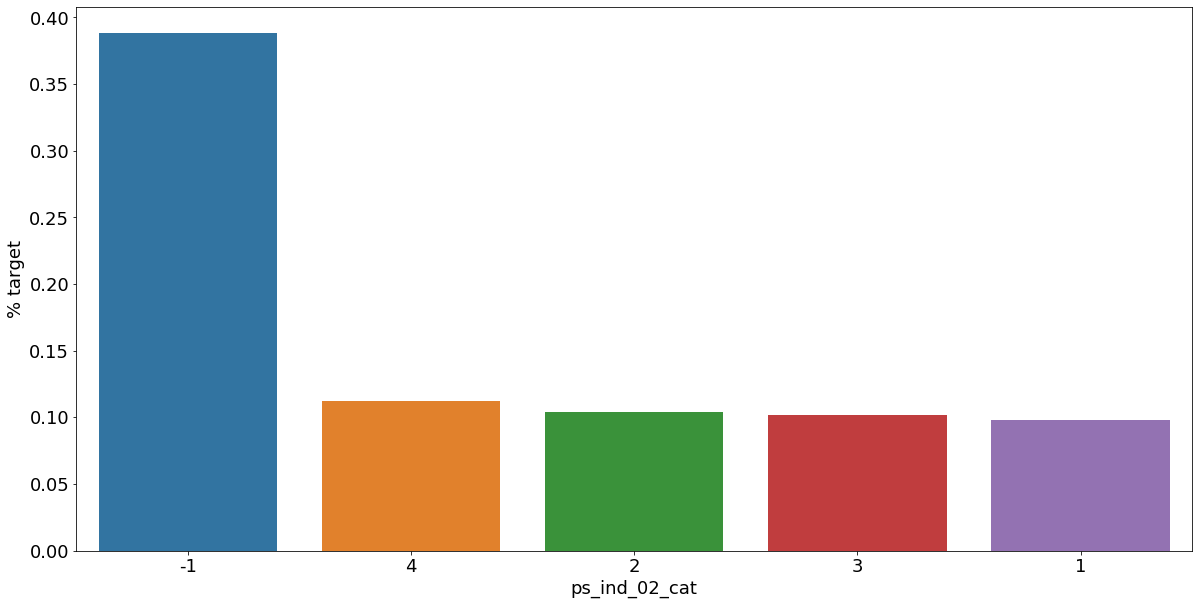

<Figure size 432x288 with 0 Axes>

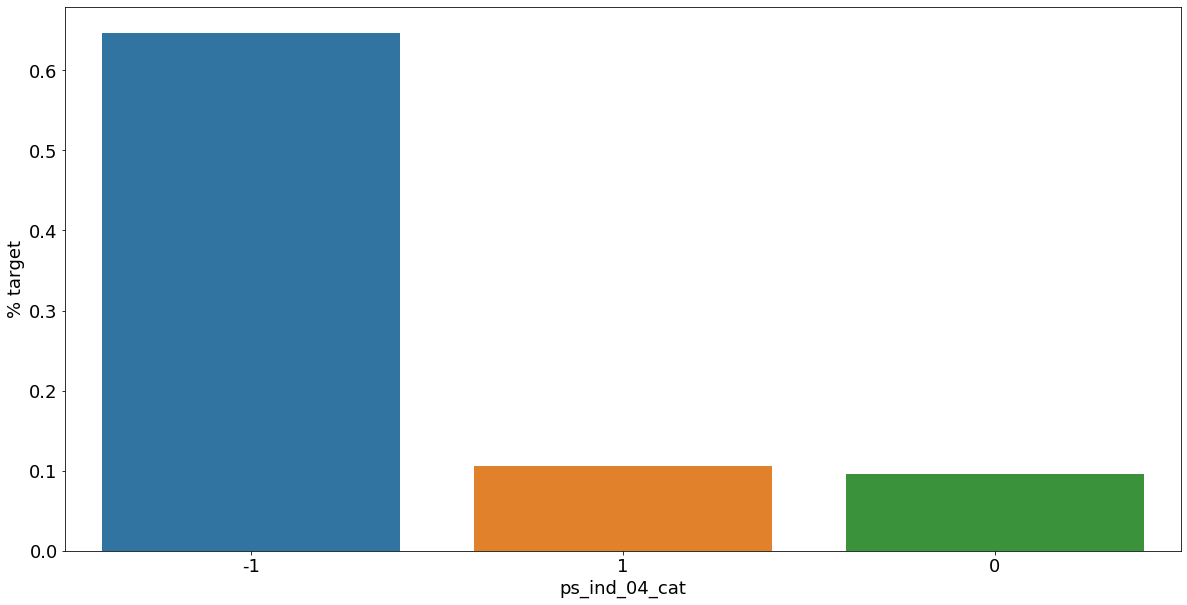

<Figure size 432x288 with 0 Axes>

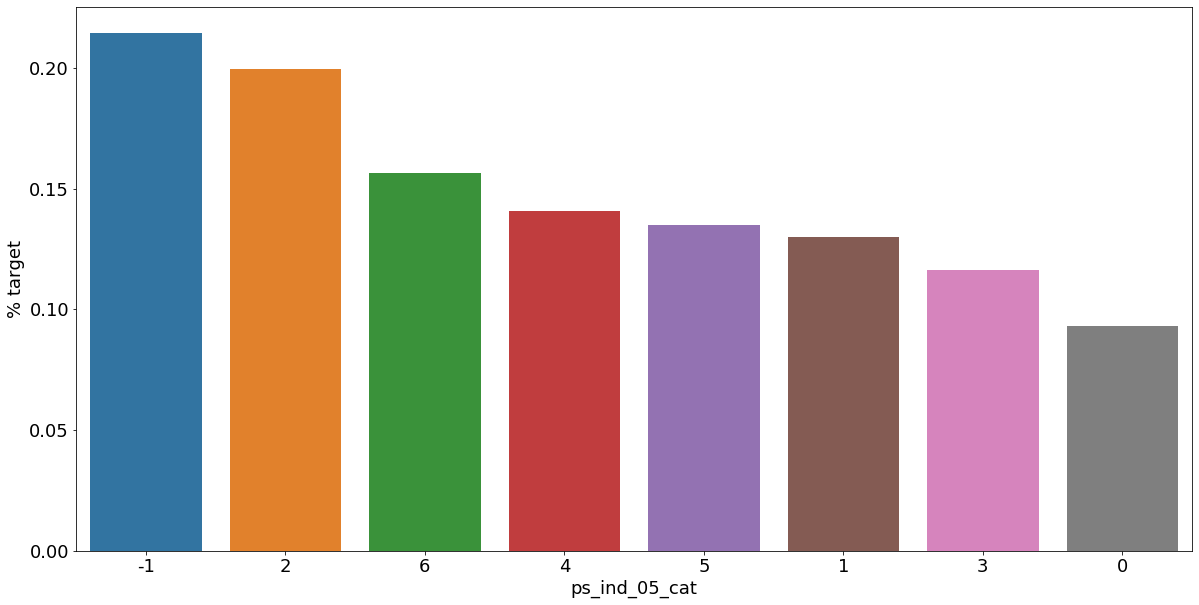

<Figure size 432x288 with 0 Axes>

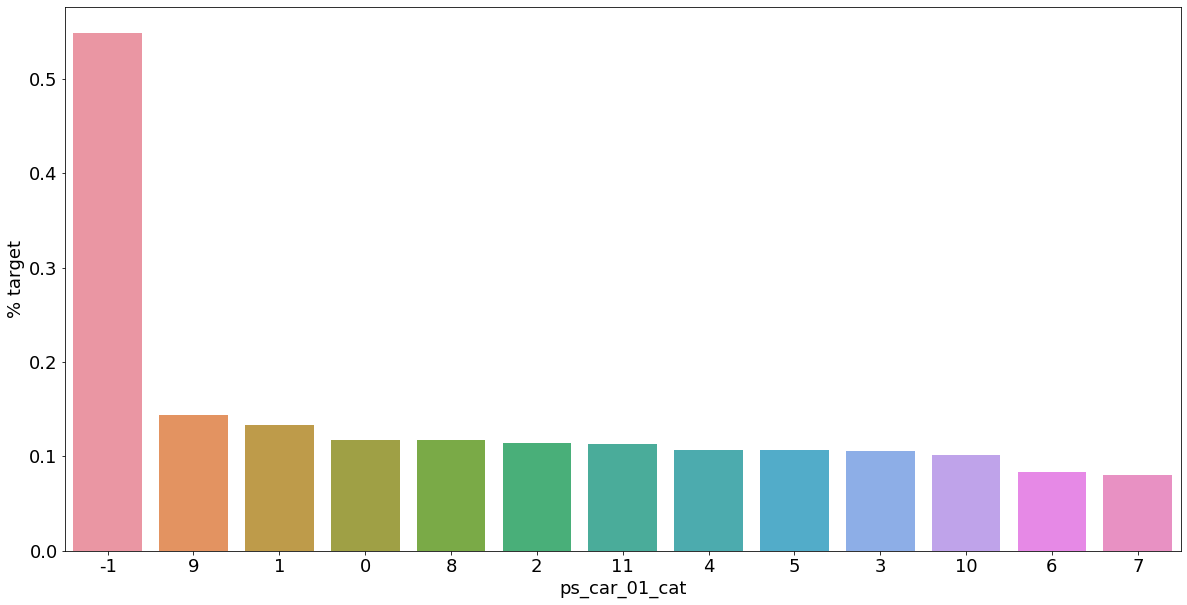

<Figure size 432x288 with 0 Axes>

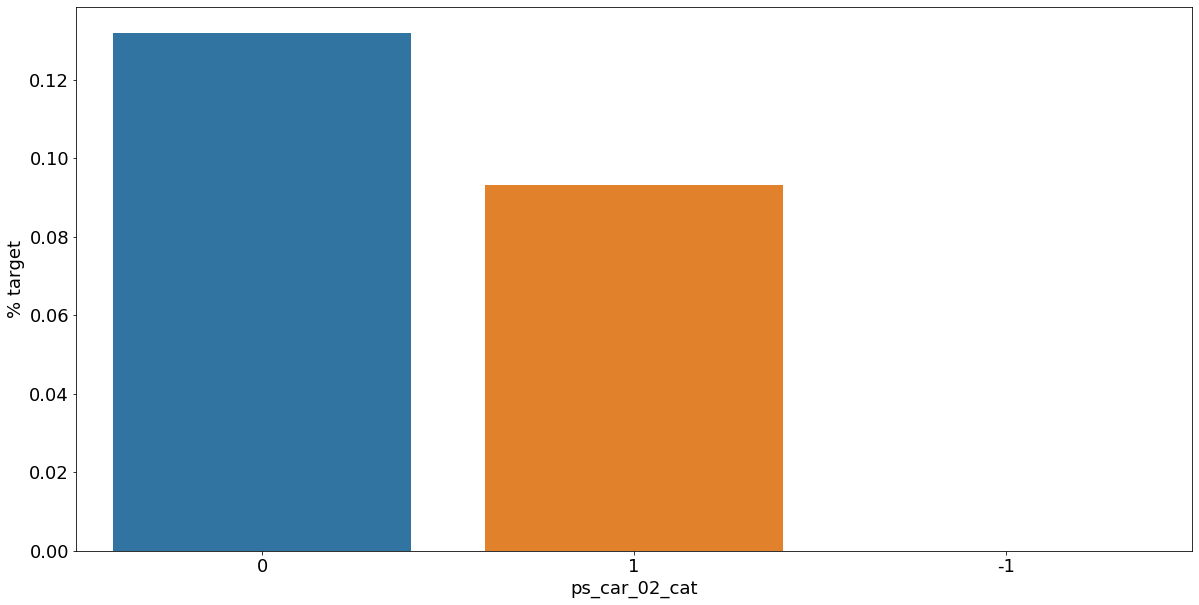

<Figure size 432x288 with 0 Axes>

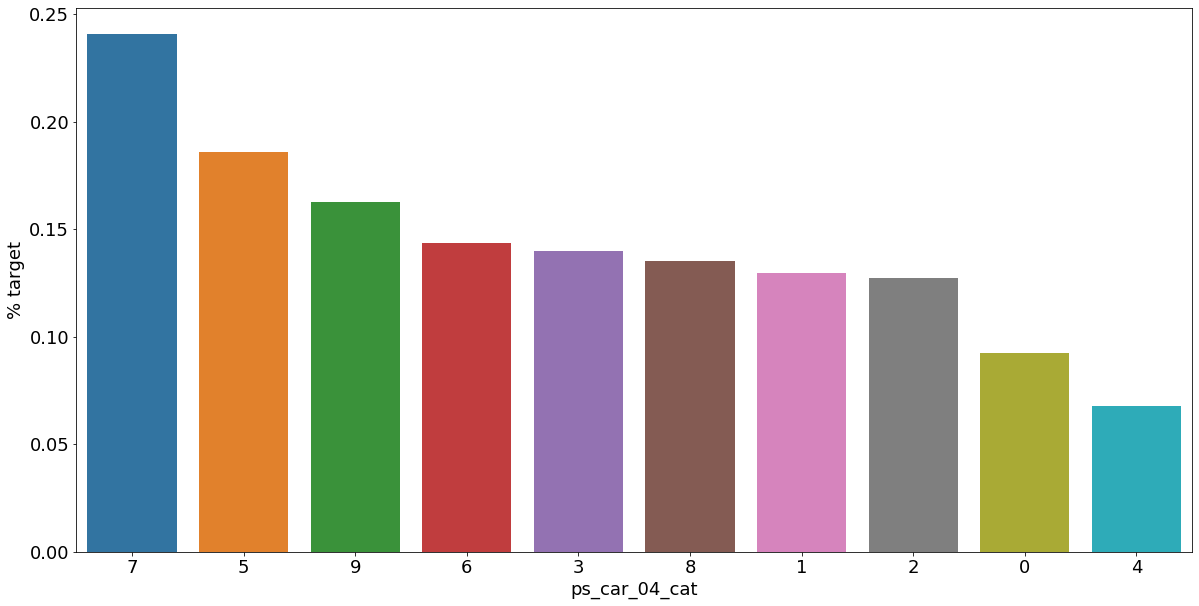

<Figure size 432x288 with 0 Axes>

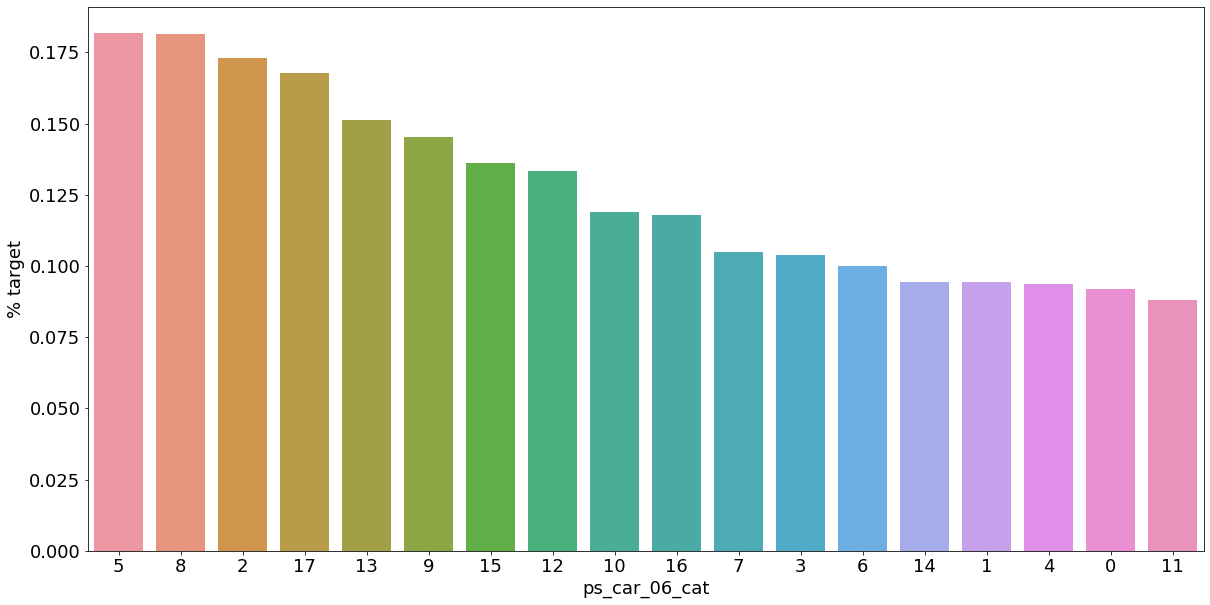

<Figure size 432x288 with 0 Axes>

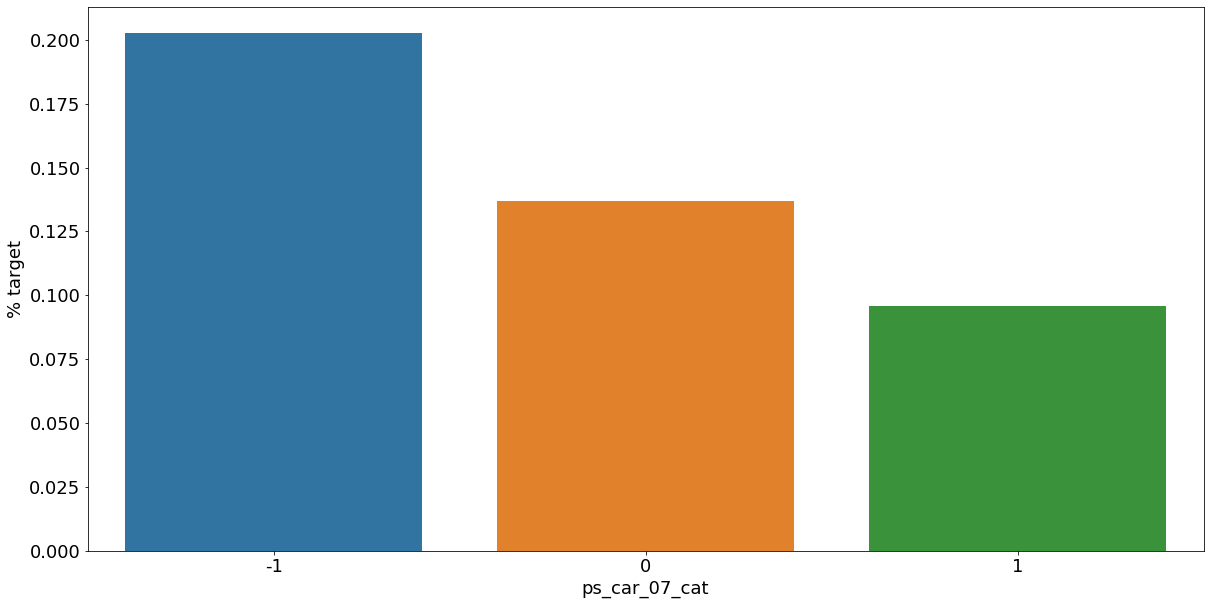

<Figure size 432x288 with 0 Axes>

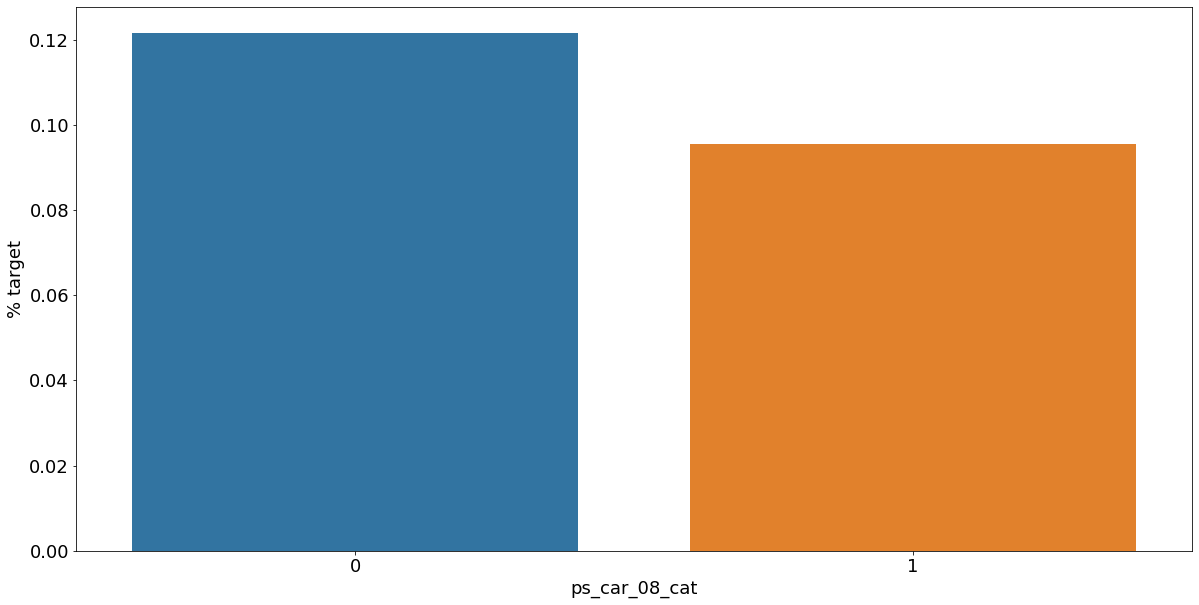

<Figure size 432x288 with 0 Axes>

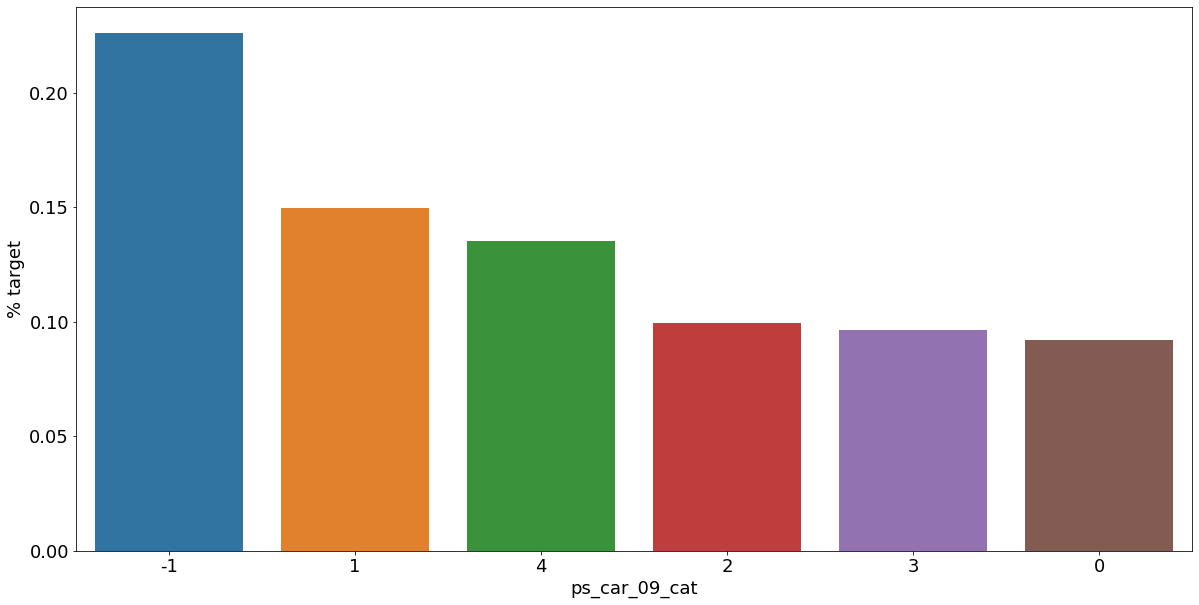

<Figure size 432x288 with 0 Axes>

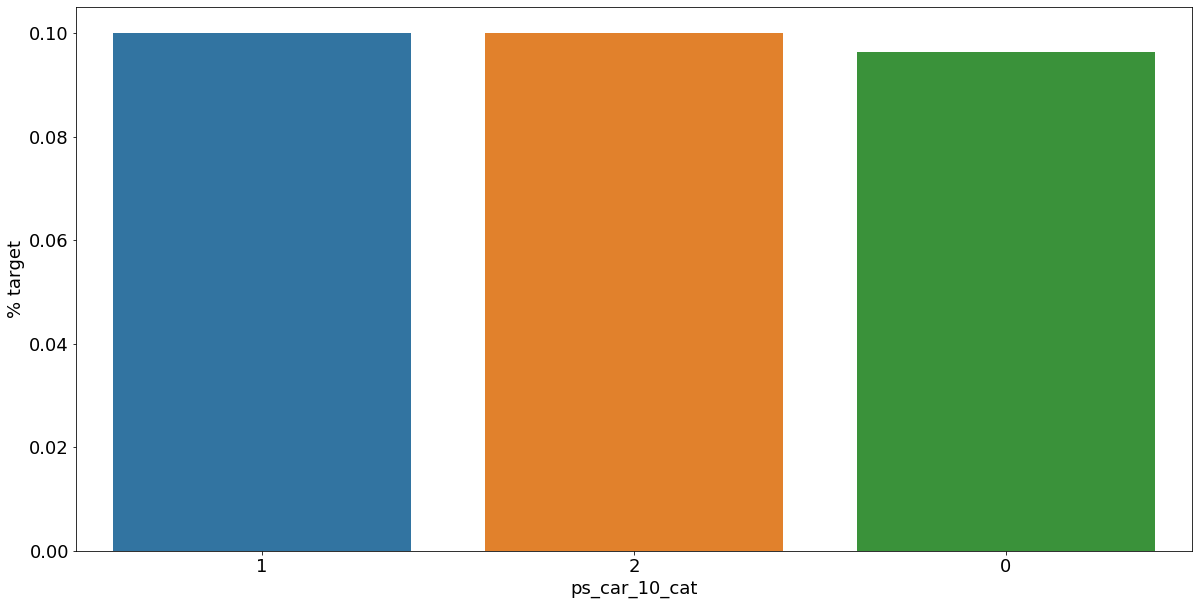

In [22]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # 타겟이 1인 사람의 비율 계산
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    # 타겟의 평균에 대해 내림차순으로 정렬
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

결측값이 있는 변수에서 알 수 있듯이 결측값을 모드로 대체하는 대신 별도의 범주 값으로 유지하는 것이 좋습니다. 누락된 가치가 있는 고객은 보험금을 청구할 확률이 훨씬 더 높은 것(경우에 따라서는 훨씬 낮은 것)으로 나타납니다.

#### Interval variables

구간 변수 간의 상관 관계를 확인합니다. 열 지도는 변수 간의 상관 관계를 시각화하는 좋은 방법입니다. 아래 코드는 Michael Waskom의 예를 기반으로 합니다

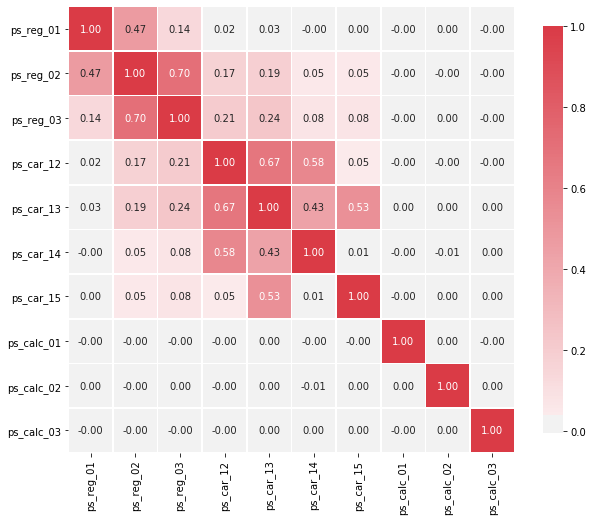

In [23]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # colormap 생성
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

변수 사이에는 다음과 같은 강한 상관 관계가 있습니다.

- ps_reg_02 와 ps_reg_03 (0.7)
- ps_car_12 와 ps_car13 (0.67)
- ps_car_12 와 ps_car14 (0.58)
- ps_car_13 와 ps_car15 (0.67)

Seaborn에는 변수 간의 (선형) 관계를 시각화하는 데 유용한 플롯이 있습니다. pairplot을 사용하여 변수 간의 관계를 시각화할 수 있습니다. 그러나 열 지도에는 이미 제한된 수의 상관 변수가 표시되었기 때문에 각 상관 변수를 개별적으로 살펴보겠습니다.

참고: 프로세스 속도를 높이기 위해 열차 데이터의 샘플을 채취합니다.

In [24]:
s = train.sample(frac=0.1)

#### ps_reg_02 와 ps_reg_03
회귀선이 보여주듯이 이러한 변수 사이에는 선형 관계가 있습니다. 색조 매개 변수 덕분에 목표값=0과 목표값=1에 대한 회귀선이 동일함을 알 수 있습니다

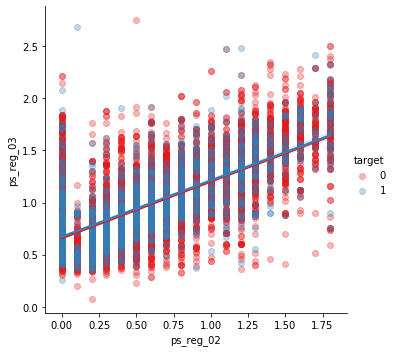

In [25]:
sns.lmplot(x='ps_reg_02',y='ps_reg_03',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 와 ps_car_13

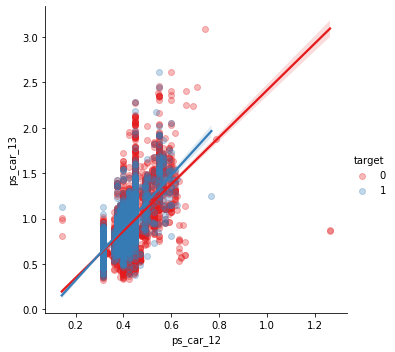

In [26]:
sns.lmplot(x='ps_car_12',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 와 ps_car_14

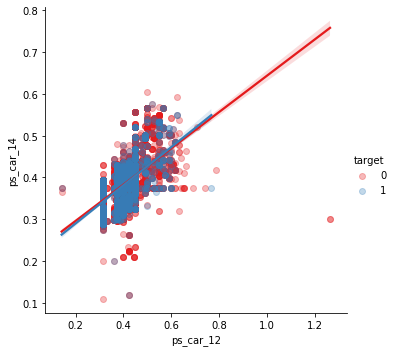

In [27]:
sns.lmplot(x='ps_car_12',y='ps_car_14',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_13 과 ps_car_15

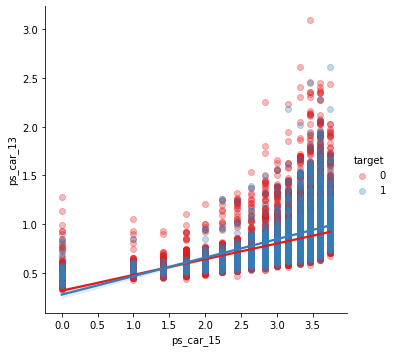

In [28]:
sns.lmplot(x='ps_car_15',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

우리는 치수를 줄이기 위해 변수에 대한 주성분 분석(PCA)을 수행할 수 있다. 모든 주의 청구 심각도 경쟁에서 나는 그것을 하기 위해 이 커널을 만들었다. 하지만 상관 변수의 수가 적은 만큼, 우리는 모델이 무거운 것을 들게 할 것입니다.

### Checking the correlations between ordinal variables

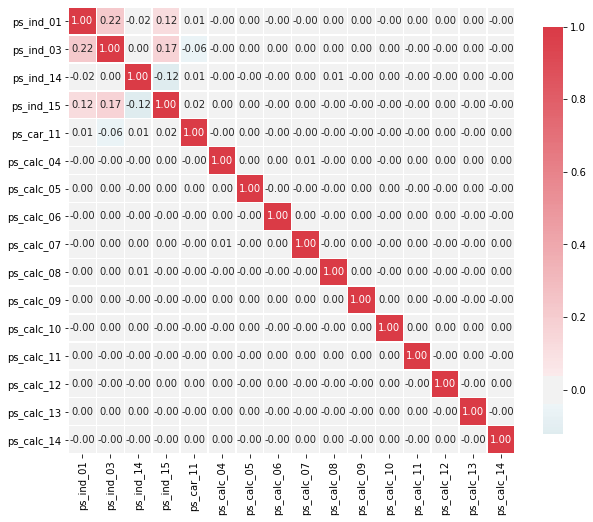

In [29]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

순서형 변수의 경우 많은 상관 관계를 볼 수 없습니다. 반면, 목표값으로 그룹화할 때 분포가 어떻게 되는지 확인할 수 있습니다.


### Feature engineering

#### Creating dummy variables

범주형 변수의 값은 순서 또는 크기를 나타내지 않습니다. 예를 들어, 카테고리 2는 카테고리 1의 두 배가 아닙니다. 따라서 우리는 그것을 다루기 위해 더미 변수를 만들 수 있다. 이 정보는 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생될 수 있으므로 첫 번째 더미 변수를 삭제한다.

In [30]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index
print('Before dummification we have {} variavles in train'.format(train.shape[1]))
train = pd.get_dummies(train,columns=v,drop_first=True)
print('After dummification we have {} variavles in train'.format(train.shape[1]))

Before dummification we have 57 variavles in train
After dummification we have 109 variavles in train


따라서 더미 변수를 생성하면 교육 세트에 52개의 변수가 추가됩니다.
#### Creating interaction variables

In [31]:
v = meta[(meta.level == 'interval')&(meta.keep)].index
poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]),columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True) 

print('Before creating interactions we have {} variavles in train'.format(train.shape[1]))
train = pd.concat([train,interactions],axis=1)
print('After creating interactions we have {} variavles in train'.format(train.shape[1]))

Before creating interactions we have 109 variavles in train
After creating interactions we have 164 variavles in train


### Feature selection
#### Removing features with low or zero variance

개인적으로, 나는 분류기 알고리즘이 유지할 기능을 선택하도록 하는 것을 선호한다. 하지만 우리가 스스로 할 수 있는 일이 하나 있습니다. 즉, 분산이 없거나 매우 낮은 형상을 제거하는 것입니다. Sklearn은 이를 위한 편리한 방법 : : 분산임계값(VarianceThreshold)을 가지고 있습니다. 기본적으로 분산이 0인 형상을 제거한다. 이전 단계에서 무차분 변수가 없는 것을 보았기 때문에 이 경기는 적용되지 않을 것이다. 그러나 1% 미만의 분산이 있는 형상을 제거한다면 31개의 변수를 제거할 것이다.

In [32]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1))

f = np.vectorize(lambda x : not x)

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

27 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


분산에 따라 선택할 경우 변수가 많이 손실됩니다. 하지만 변수가 많지 않기 때문에 분류기가 선택하도록 하겠습니다. 변수가 더 많은 데이터 집합의 경우 처리 시간을 줄일 수 있습니다.

Sklearn에는 다른 기능 선택 방법도 함께 제공됩니다. 다음 방법 중 하나는 다른 분류기가 최적의 기능을 선택하고 이러한 기능을 계속하도록 하는 SelectFrom Model입니다. 아래에서 랜덤 포레스트를 사용하는 방법을 보여드리겠습니다.

#### Selecting features with a Random Forest and SelectFromModel

여기서는 임의 포리스트의 기능 중요도에 따라 피쳐 선택을 기준으로 합니다. 그런 다음 Sklearn의 SelectFrom Model을 사용하여 유지할 변수 수를 지정할 수 있습니다. 기능 중요도 수준에 대한 임계값을 수동으로 설정할 수 있습니다. 하지만 상위 50%의 최적 변수를 선택하기만 하면 됩니다.

    아래 셀의 코드는 세바스찬 라슈카의 깃허브포에서 빌린 것이다. 이 레포에는 그의 저서 파이썬 머신 러닝의 코드 샘플이 포함되어 있는데, 이것은 반드시 읽어야 할 책이다.

In [33]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)


In [34]:
rf.fit(X_train, y_train)
importances = rf.feature_importances_

KeyboardInterrupt: 

In [ ]:
indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

SelectFrom Model을 사용하면 사용할 프리핏 분류기와 기능 중요도에 대한 임계값을 지정할 수 있습니다. get_support 방법을 사용하면 열차 데이터의 변수 수를 제한할 수 있습니다.

In [ ]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])


In [ ]:
train = train[selected_vars + ['target']]

### Feature scaling
앞에서 언급했듯이, 우리는 교육 데이터에 표준 확장을 적용할 수 있다. 일부 분류기는 이 작업이 완료되면 성능이 향상됩니다.

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'],axis=1))

## 2회차

### Loading packages


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

### Loading data

In [67]:
train = pd.read_csv('C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/porto/train.csv')
test = pd.read_csv('C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/porto/test.csv')

### Data at first sight

<데이터 설명>

- 유사한 그룹에 속한 feature는 feature 이름에 태그가 지정됩니다.(예: ind,reg,car,calc)
- feature 이름에는 이진 피쳐를 나타내는 bin과 범주형 피쳐를 나타내는 cat이 포함된다.
- 이러한 지정이 없는 형상은 연속형 또는 순서형입니다.
- -1 값은 형상이 관측치에 누락되었음을 나타냅니다.
- target column은 해당 정책 소유자에 대한 클레임이 제기되었는지 여부를 나타냅니다.

이해를 돕기 위해 처음과 마지막행을 살펴보기로 한다.

In [68]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [69]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


<확인 해야 할 것들>

- 이항 변수
- 범주 값이 정수인 범주형 변수
- 정수 또는 부동값의 기타 변수
- 결측값을 나타내는 -1이 있는 변수
- 대상 변수 및 ID 변수

이걸 확인하기 전 우선 행과 열의 수를 살펴보자

In [70]:
train.shape

(595212, 59)

59개의 변수와 595.212개의 행이 있습니다. 
교육 데이터에 중복 행이 있는지 확인해 보고, test 데이터에 동일한 수의 변수가 있는지 확인해 보겠습니다.

In [71]:
train.drop_duplicates()
train.shape

(595212, 59)

In [72]:
test.shape

(892816, 58)

테스트 세트에 변수가 하나 누락되었지만 이것은 target이므로 괜찮습니다.
이제 각 유형의 변수가 몇 개인지 살펴보겠습니다.

그래서 나중에 우리는 14개의 범주형 변수에 대한 더미 변수를 만들 수 있습니다. 빈 변수는 이미 이진수이므로 더미화할 필요가 없습니다.

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

info() method를 사용하면 데이터 유형이 정수 또는 float라는 것을 알 수 있습니다. 

데이터 집합에 null 값이 없는데 이는 결측값이 -1로 대체되었기 때문입니다.(-1은 정상적인 값)

### Metadata

데이터 관리를 용이하게 하기 위해 변수에 대한 메타 정보를 데이터 프레임에 저장합니다. 이는 분석, 시각화, 모델링 등에 대한 특정 변수를 선택하려는 경우에 유용합니다.

구체적으로 다음과 같이 저장할 수 있습니다.

role : 입력, ID, 대상  
level : 공칭, 구간, 순서, 이항  
keep : 참 또는 거짓  
dtype :int, float, str  

In [73]:
data = []
for f in train.columns:
    # role 정의
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # level 정의
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
        
    # id를 제외한 다른값은 keep을 True로 설정
    keep = True
    if f == 'id':
        keep = False
    
    # datatype 정의
    dtype = train[f].dtype
    
    # Dictionary 정의
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [74]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [75]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [76]:
pd.DataFrame({'count':meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


### Descriptive statistics

우리는 또한 데이터 프레임에 기술 방법을 적용할 수 있다. 그러나 범주형 변수와 id 변수에 대해 평균 std를 계산하는 것은 그다지 의미가 없습니다. 나중에 시각적으로 범주형 변수를 살펴보겠습니다.

메타 파일 덕분에 기술 통계량을 계산할 변수를 쉽게 선택할 수 있습니다. 이를 명확히 하기 위해 데이터 유형별로 살펴보겠습니다.

#### Interval variables

In [77]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


1. 레그 변수
    - ps_reg_03에만 결측값이 있습니다.
    - 범위(최소 ~ 최대)가 변수 간에 다릅니다. 스케일링을 적용할 수 있지만(예: StandardScaler) 사용할 분류기에 따라 다르다.  
.    
2. 자동차 변수
    - ps_car_12 및 ps_car_15에 결측값이 있습니다.
    - 범위가 다르고 스케일링을 적용할 수 있습니다.  
.    
3. 계산 변수
    - 결측값이 없음
    - 이것은 어떤 종류의 비율인 것 같다. 왜냐하면 최대값은 0.9이기 때문이다.
    - 세 _수치 변수 모두 분포가 매우 유사합니다.  
  
전체적으로 구간 변수의 범위가 작은 것을 알 수 있습니다. 데이터를 익명화하기 위해 일부 변환(예: 로그)이 이미 적용되었을 수 있을까?

#### Ordinal variables

In [78]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


누락된 변수는 ps_car_11입니다.  
다양한 범위를 처리하기 위해 스케일링을 적용할 수 있습니다.

#### Binary variables

In [79]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- train의 mean이 3.645%로 매우 불균형적입니다.
- 평균으로부터 대부분의 변수에 대해 대부분의 경우 값이 0이라는 결론을 내릴 수 있습니다.

### Handling imbalanced classes

위에서 언급했듯이 대상=1이 있는 기록의 비율은 대상=0보다 훨씬 적다. 따라서 정확도는 높지만 실제로는 부가가치가 있는 모델이 될 수 있습니다. 이 문제를 해결하기 위한 두 가지 가능한 전략은 다음과 같습니다.

- 대상 =1로 레코드 오버샘플링
- 대상 =0으로 레코드 언더 샘플링

물론 더 많은 전략이 있으며 MachineLearningMastery.com은 멋진 개요를 제공합니다. 훈련 세트가 상당히 크기 때문에 언더샘플링을 할 수 있습니다.

In [80]:
desired_apriori=0.10

#타겟값에 해당하는 인덱스 정리
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

#인덱스 값에 해당하는 레코드 수 가져오기
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# 대상=0으로 실행한 언더 샘플링 속도 및 결과 기록 수 계산
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0:{}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# 원하는 a priority에 도달하기 위해 대상 =0으로 레코드를 임의로 선택
undersampled_idx = shuffle(idx_0,random_state=37, n_samples=undersampled_nb_0)

# 나머지 인덱스를 사용하여 리스트 생성
idx_list = list(undersampled_idx) + list(idx_1)

#Undersample 데이터프레임 반환
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0:0.34043569687437886
Number of records with target=0 after undersampling: 195246


### Data Quality Checks
#### Checking missing values  
  
결측값은 -1로 표시됨

In [81]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f]== -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missing_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f,missings,missings_perc))
        
print('In total, there are {} Variable with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (7.25%) with missing values
Variable ps_ind_04_cat has 51 records (7.25%) with missing values
Variable ps_ind_05_cat has 2256 records (7.25%) with missing values
Variable ps_reg_03 has 38580 records (7.25%) with missing values
Variable ps_car_01_cat has 62 records (7.25%) with missing values
Variable ps_car_02_cat has 2 records (7.25%) with missing values
Variable ps_car_03_cat has 148367 records (7.25%) with missing values
Variable ps_car_05_cat has 96026 records (7.25%) with missing values
Variable ps_car_07_cat has 4431 records (7.25%) with missing values
Variable ps_car_09_cat has 230 records (7.25%) with missing values
Variable ps_car_11 has 1 records (7.25%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 Variable with missing values


- ps_car_03_cat과 ps_car_05_cat은 결측값이 있는 레코드의 비율이 크다. 이러한 변수를 제거합니다.
- 결측값이 있는 다른 범주형 변수의 경우 결측값 -1을 그대로 둘 수 있습니다.
- ps_reg_03(반복)에 모든 레코드의 18%에 대한 결측값이 있습니다. 평균으로 대체합니다.
- ps_car_11(ordinary)에 누락된 값이 있는 레코드는 5개뿐이다. mode로 대체합니다.
- ps_car_12(반복)에 결측값이 있는 레코드는 1개뿐입니다. 평균으로 대체합니다.
- ps_car_14(확장)에 모든 레코드의 7%에 대한 결측값이 있습니다. 평균으로 대체합니다.

In [82]:
# 결측값이 너무 많은 변수 삭제
vars_to_drop = ['ps_car_03_cat','ps_car_05_cat']
train.drop(vars_to_drop,inplace=True,axis=1)
meta.loc[(vars_to_drop),'keep'] = False #meta 업데이트

# 결측값을 다른 값(평균 또는 mode)으로 대체
mean_imp = SimpleImputer(missing_values= -1, strategy = 'mean')
mode_imp = SimpleImputer(missing_values= -1, strategy = 'most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables

카디널리티는 변수의 여러 가지 값 수를 나타냅니다. 나중에 범주형 변수에서 더미 변수를 만들기 때문에, 우리는 많은 구별되는 값을 가진 변수가 있는지 확인해야 한다. 이러한 변수는 더미 변수를 많이 만들 수 있으므로 다르게 처리해야 한다.

In [83]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f,dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


- ps_car_11_cat만이 많은 구별되는 값을 가지고 있지만 여전히 합리적이다.  
  
smoothing은 Danielle Micci-Barreca가 다음 논문에서와 같이 계산한다.
https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
- trn_series : pd로서 범주형 기능을 교육합니다.(Series)
- tst_Series : 범주형 기능을 pd로 테스트합니다.(Series)
- target  : 대상 데이터를 pd로 지정합니다.(Series)
- min_twin_leaf(int): 범주 평균을 고려하기 위한 최소 표본
- smoothing(int): 범주형 평균 대 이전 값의 균형을 맞추기 위한 평활 효과

In [84]:
# 코드 출처 : https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series,noise_level):
    return series * (1+noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,
                 tst_series=None,
                 target=None,
                 min_samples_leaf=1,
                 smoothing=1,
                 noise_level=0):
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series,target],axis=1)
    
    #target 평균 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean','count'])
    #smoothing 계산
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    #모든 타겟 데이터에 평균 적용
    prior = target.mean()
    # 카운트가 클수록 full_avg가 적게 고려되도록 만들기
    averages[target.name] = prior * (1-smoothing) + averages['mean'] * smoothing
    averages.drop(['mean','count'],axis=1,inplace=True)
    
    #train과 test에 적용
    ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name),
                            averages.reset_index().rename(columns={'index':target.name,target.name:'average'}),
                            on = trn_series.name,
                            how='left')['average'].rename(trn_series.name+'_mean').fillna(prior)
    
    # merge시 사라진 인덱스 복구
    ft_trn_series.index = trn_series.index
    
    # test에도 똑같이 적용
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
                            averages.reset_index().rename(columns={'index':target.name,target.name:'average'}),
                            on = tst_series.name,
                            how='left')['average'].rename(trn_series.name+'_mean').fillna(prior)
    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [85]:
train_ecoded, test_encoded = target_encode(train['ps_car_11_cat'],
                                          test['ps_car_11_cat'],
                                          target = train.target,
                                          min_samples_leaf = 100,
                                          smoothing = 10,
                                          noise_level = 0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat_te',axis=1,inplace=True)
meta.loc['ps_car_11_cat','keep'] = False

test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat_te',axis=1,inplace=True)

### Exploratory Data Visualization
#### Categorical variables
범주형 변수와 목표값 = 1을 가진 고객의 비율을 살펴보겠습니다.

<Figure size 432x288 with 0 Axes>

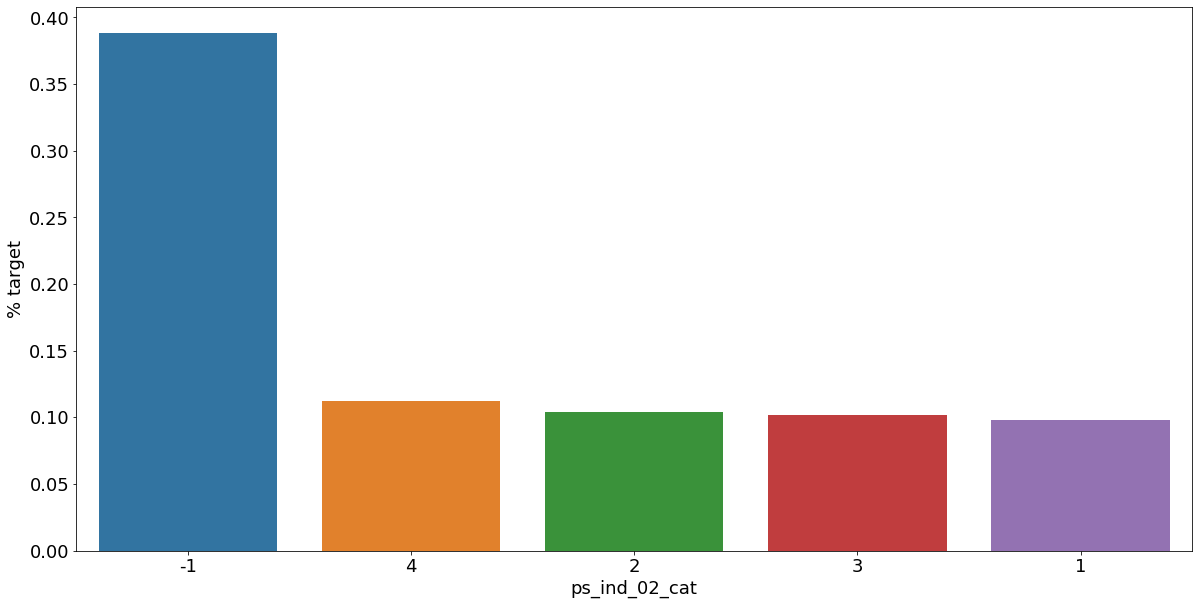

<Figure size 432x288 with 0 Axes>

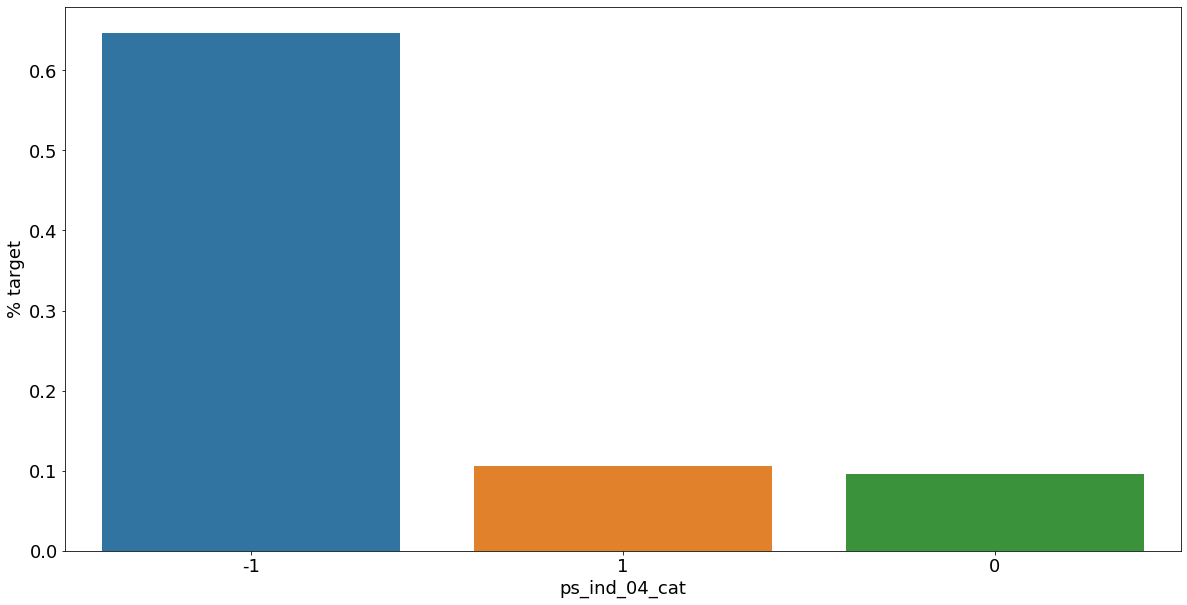

<Figure size 432x288 with 0 Axes>

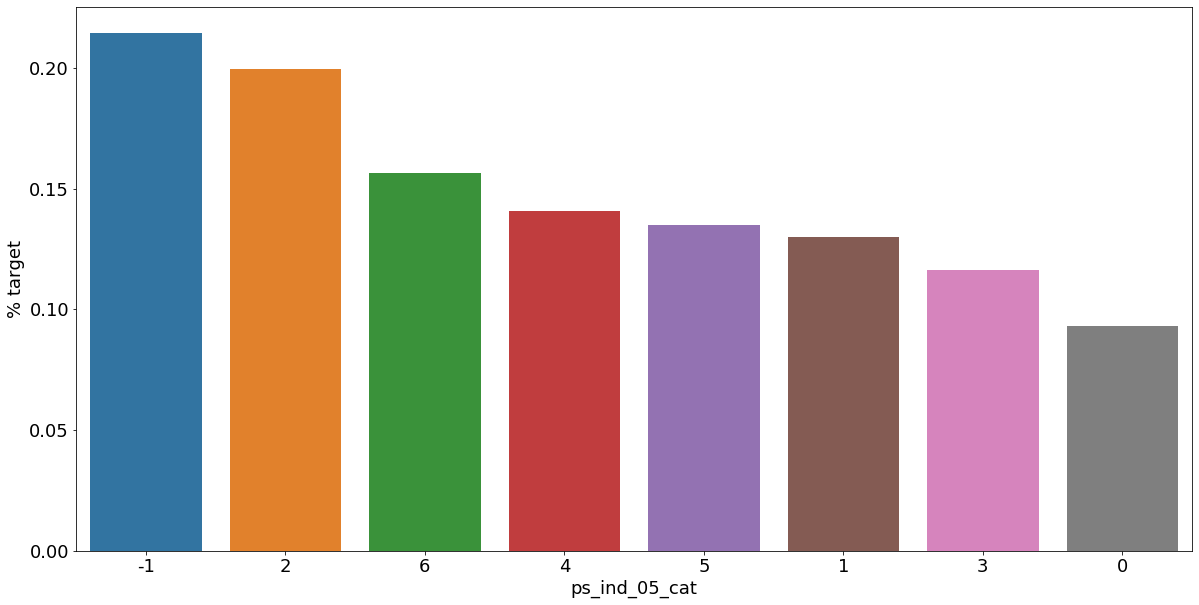

<Figure size 432x288 with 0 Axes>

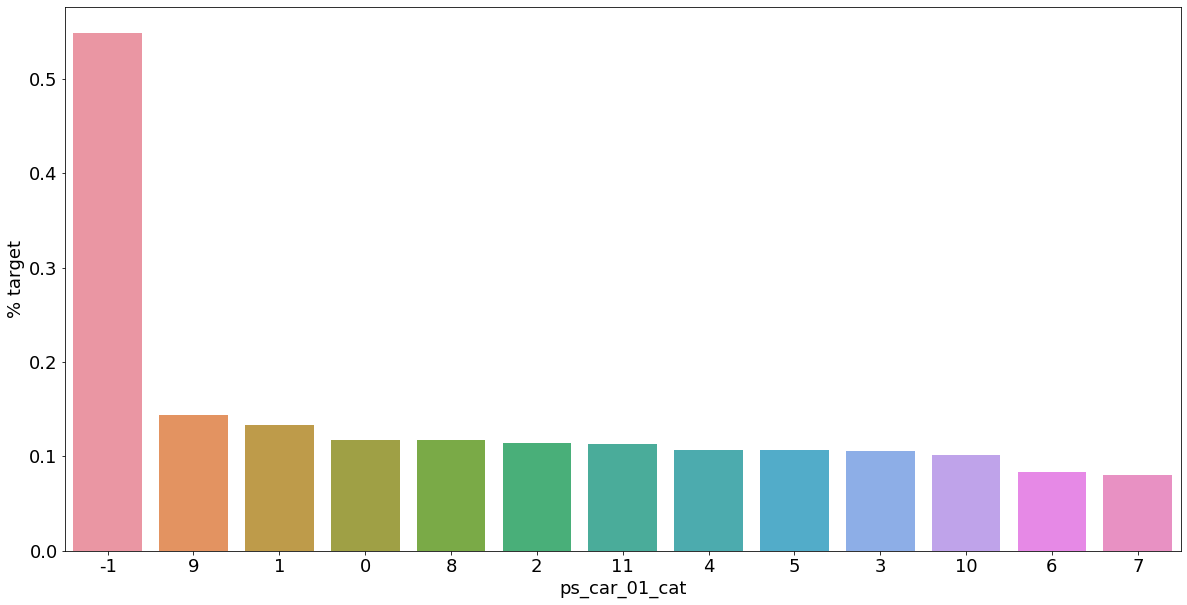

<Figure size 432x288 with 0 Axes>

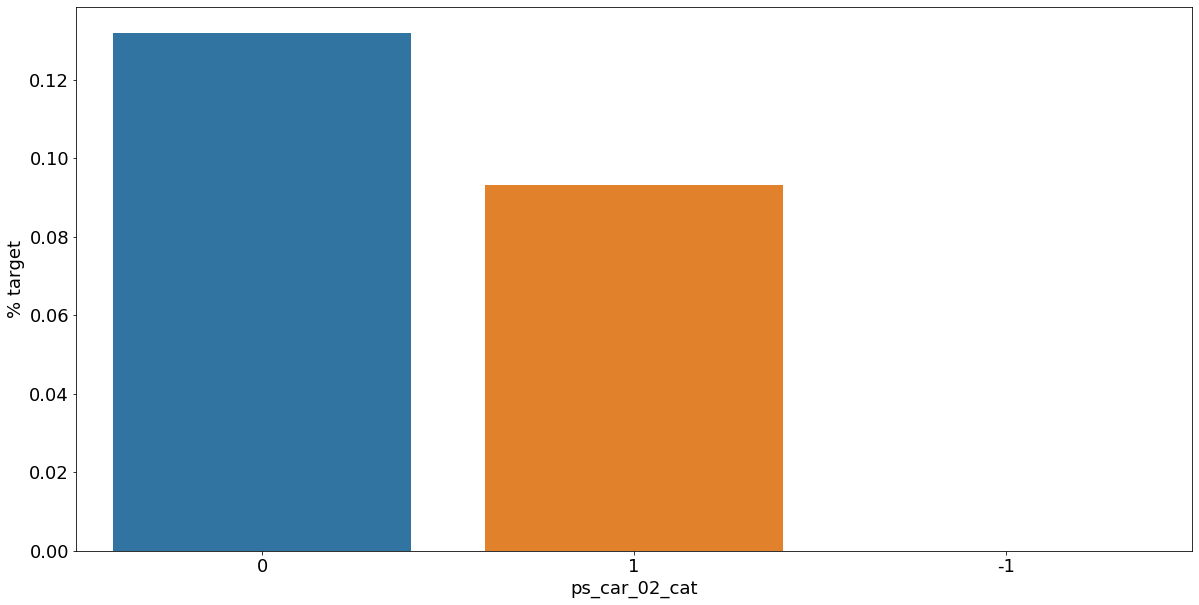

<Figure size 432x288 with 0 Axes>

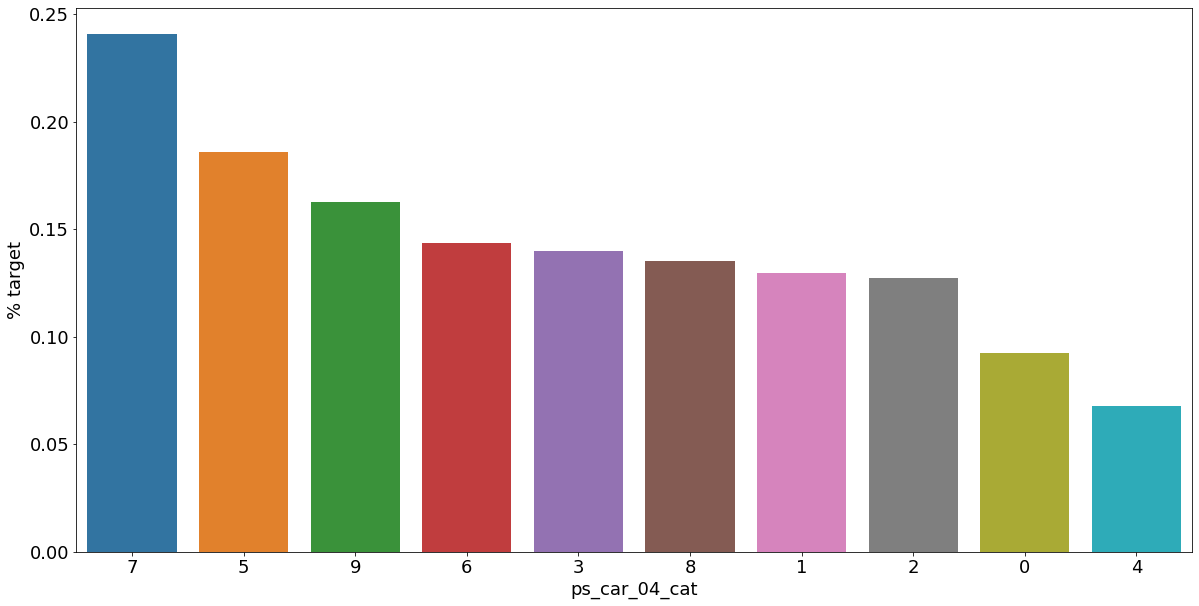

<Figure size 432x288 with 0 Axes>

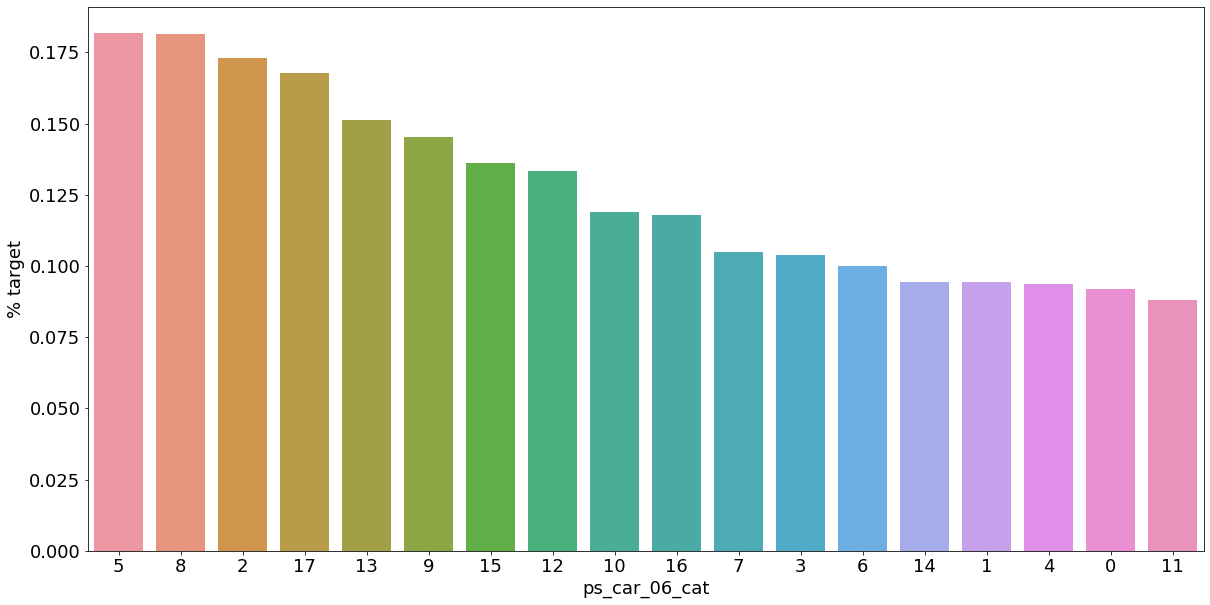

<Figure size 432x288 with 0 Axes>

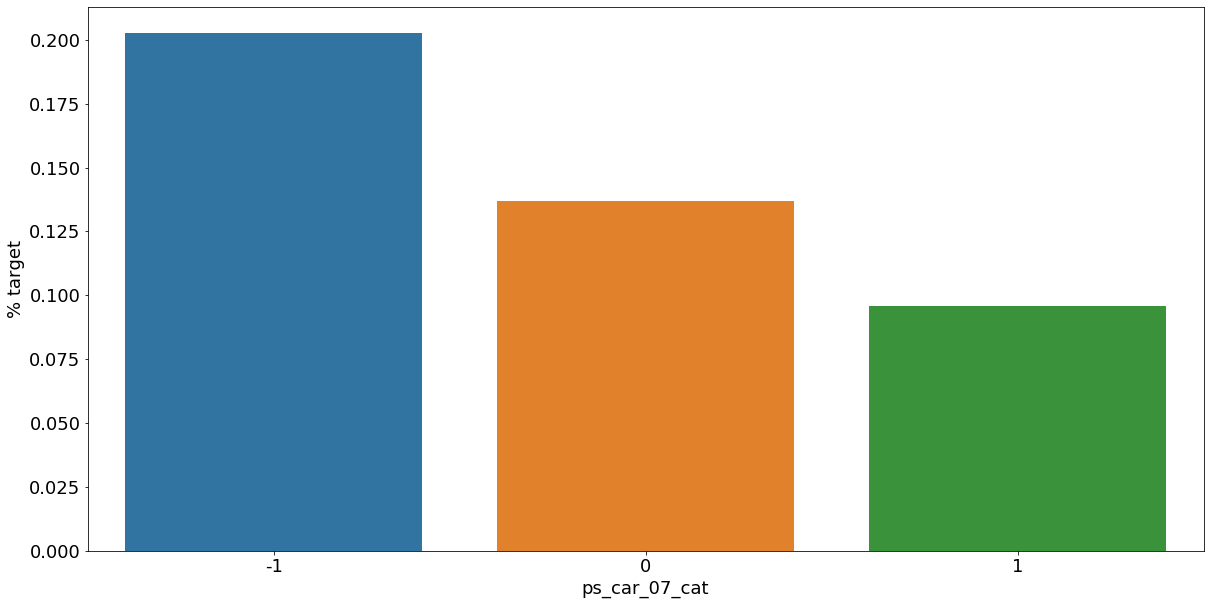

<Figure size 432x288 with 0 Axes>

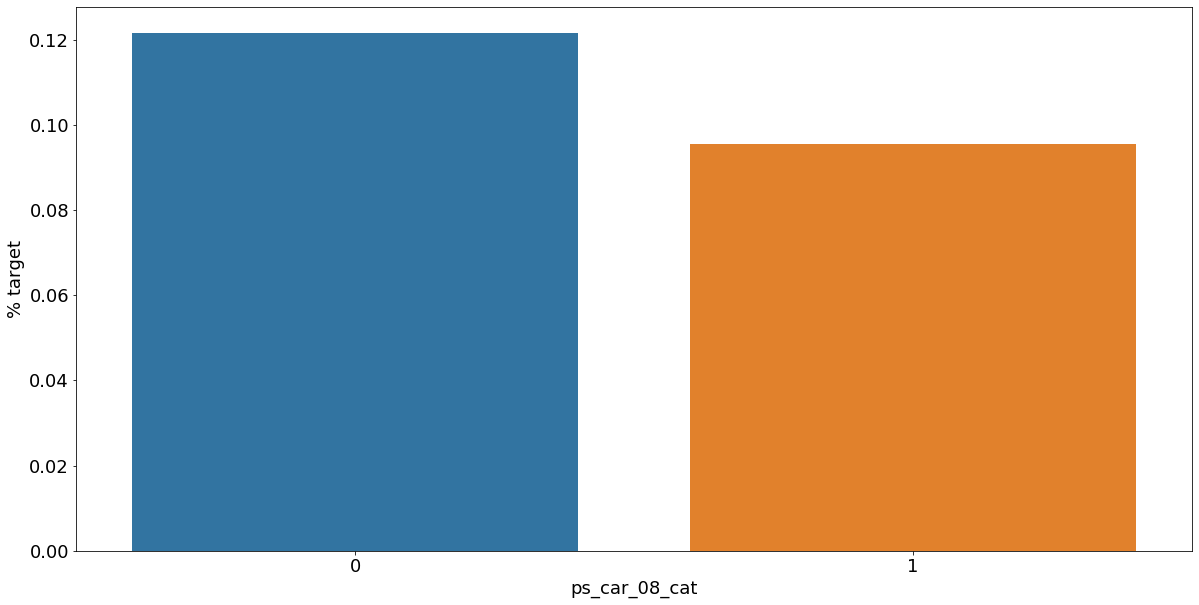

<Figure size 432x288 with 0 Axes>

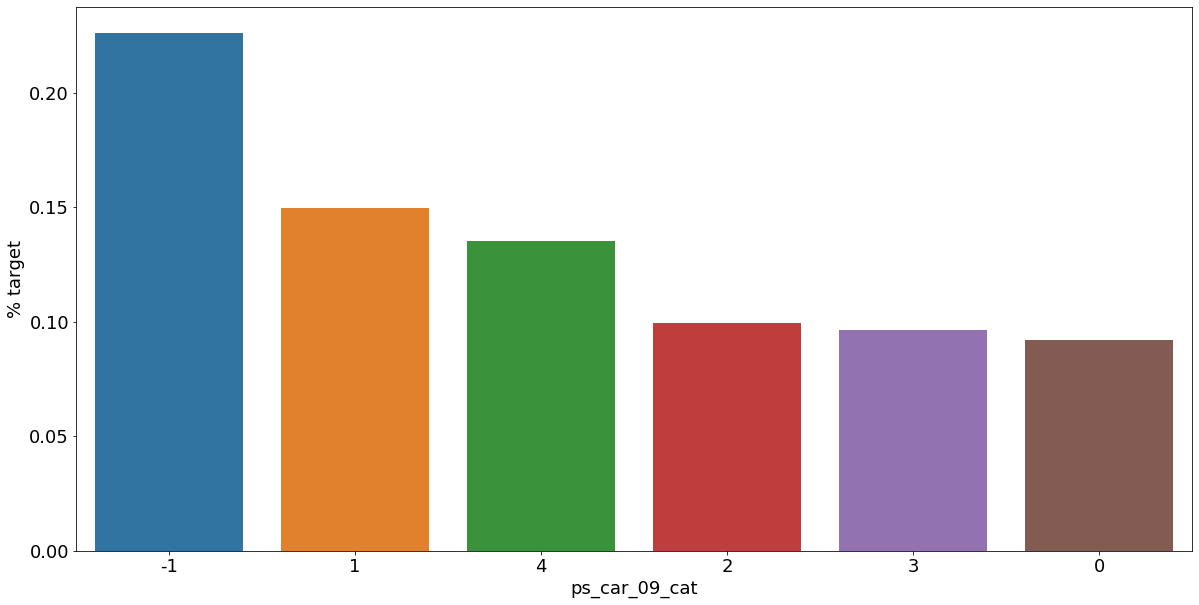

<Figure size 432x288 with 0 Axes>

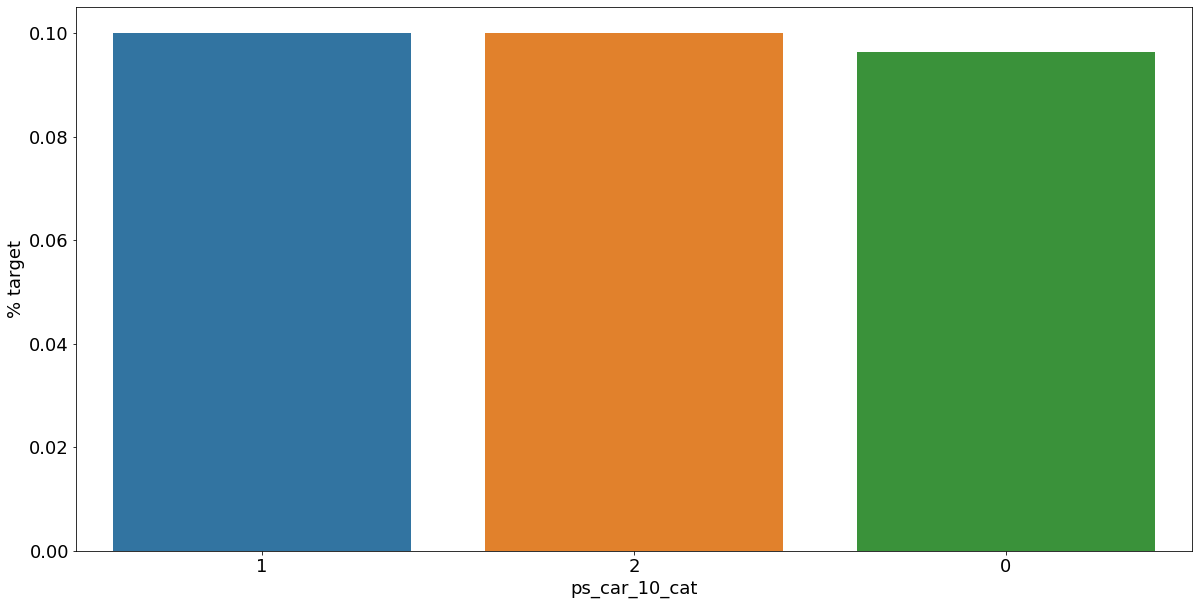

In [86]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    
    #타겟이 1인 사람의 비율 계산
    cat_perc = train[[f,'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by ='target',ascending = False, inplace = True)
    
    #타겟의 평균에 대해 내림차순 정렬
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

결측값이 있는 변수에서 알 수 있듯이 결측값을 모드로 대체하는 대신 별도의 범주 값으로 유지하는 것이 좋습니다. 누락된 가치가 있는 고객은 보험금을 청구할 확률이 훨씬 더 높은 것(경우에 따라서는 훨씬 낮은 것)으로 나타납니다.

#### Interval variables

구간 변수 간의 상관 관계를 확인합니다. 열 지도는 변수 간의 상관 관계를 시각화하는 좋은 방법입니다. 아래 코드는 Michael Waskom의 예를 기반으로 합니다

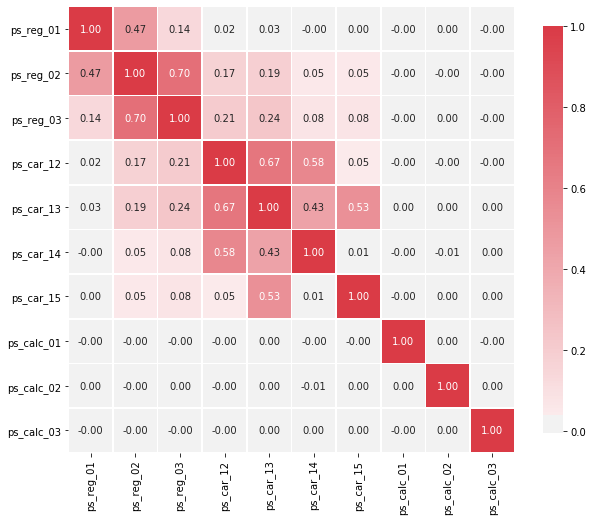

In [87]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # colormap 생성
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

변수 사이에는 다음과 같은 강한 상관 관계가 있습니다.

- ps_reg_02 와 ps_reg_03 (0.7)
- ps_car_12 와 ps_car13 (0.67)
- ps_car_12 와 ps_car14 (0.58)
- ps_car_13 와 ps_car15 (0.67)

Seaborn에는 변수 간의 (선형) 관계를 시각화하는 데 유용한 플롯이 있습니다. pairplot을 사용하여 변수 간의 관계를 시각화할 수 있습니다. 그러나 열 지도에는 이미 제한된 수의 상관 변수가 표시되었기 때문에 각 상관 변수를 개별적으로 살펴보겠습니다.

참고: 프로세스 속도를 높이기 위해 열차 데이터의 샘플을 채취합니다.

In [88]:
s = train.sample(frac=0.1)

#### ps_reg_02 와 ps_reg_03
회귀선이 보여주듯이 이러한 변수 사이에는 선형 관계가 있습니다. 색조 매개 변수 덕분에 목표값=0과 목표값=1에 대한 회귀선이 동일함을 알 수 있습니다

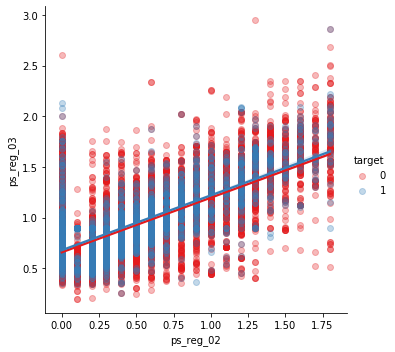

In [89]:
sns.lmplot(x='ps_reg_02',y='ps_reg_03',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 와 ps_car_13

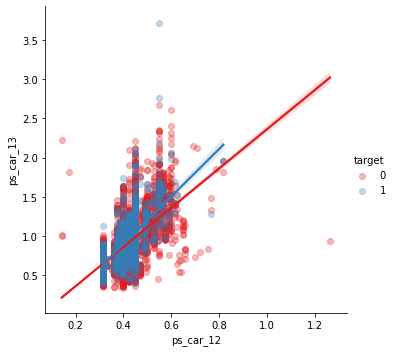

In [90]:
sns.lmplot(x='ps_car_12',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 와 ps_car_14

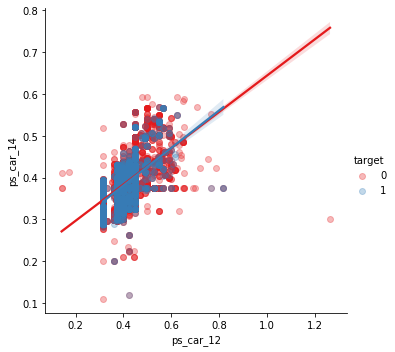

In [91]:
sns.lmplot(x='ps_car_12',y='ps_car_14',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_13 과 ps_car_15

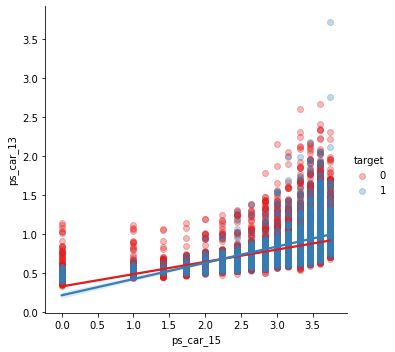

In [92]:
sns.lmplot(x='ps_car_15',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

우리는 치수를 줄이기 위해 변수에 대한 주성분 분석(PCA)을 수행할 수 있다. 모든 주의 청구 심각도 경쟁에서 나는 그것을 하기 위해 이 커널을 만들었다. 하지만 상관 변수의 수가 적은 만큼, 우리는 모델이 무거운 것을 들게 할 것입니다.

### Checking the correlations between ordinal variables

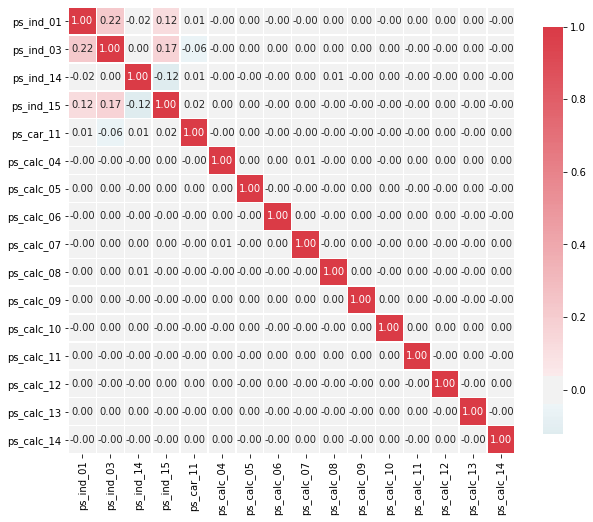

In [93]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

순서형 변수의 경우 많은 상관 관계를 볼 수 없습니다. 반면, 목표값으로 그룹화할 때 분포가 어떻게 되는지 확인할 수 있습니다.


### Feature engineering

#### Creating dummy variables

범주형 변수의 값은 순서 또는 크기를 나타내지 않습니다. 예를 들어, 카테고리 2는 카테고리 1의 두 배가 아닙니다. 따라서 우리는 그것을 다루기 위해 더미 변수를 만들 수 있다. 이 정보는 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생될 수 있으므로 첫 번째 더미 변수를 삭제한다.

In [94]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train,columns=v,drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


따라서 더미 변수를 생성하면 교육 세트에 52개의 변수가 추가됩니다.
#### Creating interaction variables

In [95]:
v = meta[(meta.level == 'interval')&(meta.keep)].index
poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]),columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True) 

print('Before creating interactions we have {} variavles in train'.format(train.shape[1]))
train = pd.concat([train,interactions],axis=1)
print('After creating interactions we have {} variavles in train'.format(train.shape[1]))

Before creating interactions we have 109 variavles in train
After creating interactions we have 164 variavles in train


### Feature selection
#### Removing features with low or zero variance

개인적으로, 나는 분류기 알고리즘이 유지할 기능을 선택하도록 하는 것을 선호한다. 하지만 우리가 스스로 할 수 있는 일이 하나 있습니다. 즉, 분산이 없거나 매우 낮은 형상을 제거하는 것입니다. Sklearn은 이를 위한 편리한 방법 : : 분산임계값(VarianceThreshold)을 가지고 있습니다. 기본적으로 분산이 0인 형상을 제거한다. 이전 단계에서 무차분 변수가 없는 것을 보았기 때문에 이 경기는 적용되지 않을 것이다. 그러나 1% 미만의 분산이 있는 형상을 제거한다면 31개의 변수를 제거할 것이다.

In [96]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1))

f = np.vectorize(lambda x : not x)

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

27 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


분산에 따라 선택할 경우 변수가 많이 손실됩니다. 하지만 변수가 많지 않기 때문에 분류기가 선택하도록 하겠습니다. 변수가 더 많은 데이터 집합의 경우 처리 시간을 줄일 수 있습니다.

Sklearn에는 다른 기능 선택 방법도 함께 제공됩니다. 다음 방법 중 하나는 다른 분류기가 최적의 기능을 선택하고 이러한 기능을 계속하도록 하는 SelectFrom Model입니다. 아래에서 랜덤 포레스트를 사용하는 방법을 보여드리겠습니다.

#### Selecting features with a Random Forest and SelectFromModel

여기서는 임의 포리스트의 기능 중요도에 따라 피쳐 선택을 기준으로 합니다. 그런 다음 Sklearn의 SelectFrom Model을 사용하여 유지할 변수 수를 지정할 수 있습니다. 기능 중요도 수준에 대한 임계값을 수동으로 설정할 수 있습니다. 하지만 상위 50%의 최적 변수를 선택하기만 하면 됩니다.

    아래 셀의 코드는 세바스찬 라슈카의 깃허브포에서 빌린 것이다. 이 레포에는 그의 저서 파이썬 머신 러닝의 코드 샘플이 포함되어 있는데, 이것은 반드시 읽어야 할 책이다.

In [97]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

#2회차부터는 빠르게 하기 위해 n_estimators를 100으로 줄였다.
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

In [98]:
rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_13^2                    0.018160
 2) ps_car_13                      0.017638
 3) ps_car_13 ps_car_14            0.017519
 4) ps_car_12 ps_car_13            0.017496
 5) ps_reg_03 ps_car_13            0.017346
 6) ps_car_13 ps_car_15            0.017033
 7) ps_reg_01 ps_car_13            0.017021
 8) ps_reg_03 ps_car_14            0.016429
 9) ps_reg_03 ps_car_12            0.015605
10) ps_car_14 ps_car_15            0.015426
11) ps_reg_03 ps_car_15            0.015223
12) ps_reg_01 ps_reg_03            0.014916
13) ps_car_13 ps_calc_02           0.014716
14) ps_car_13 ps_calc_01           0.014672
15) ps_car_13 ps_calc_03           0.014663
16) ps_reg_02 ps_car_13            0.014614
17) ps_reg_01 ps_car_14            0.014521
18) ps_reg_03^2                    0.014355
19) ps_reg_03                      0.014304
20) ps_reg_03 ps_calc_01           0.013877
21) ps_reg_03 ps_calc_03           0.013794
22) ps_calc_10                     0.013756
23) ps_car_14 ps_calc_02        

SelectFrom Model을 사용하면 사용할 프리핏 분류기와 기능 중요도에 대한 임계값을 지정할 수 있습니다. get_support 방법을 사용하면 열차 데이터의 변수 수를 제한할 수 있습니다.

In [103]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])


Number of features before selection: 162
Number of features after selection: 81


In [104]:
train = train[selected_vars + ['target']]

### Feature scaling
앞에서 언급했듯이, 우리는 교육 데이터에 표준 확장을 적용할 수 있다. 일부 분류기는 이 작업이 완료되면 성능이 향상됩니다.

In [105]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'],axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])

## 3회차

### Loading packages

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

### Loading data

In [131]:
train = pd.read_csv('C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/porto/train.csv')
test = pd.read_csv('C:/Users/이동훈/Desktop/github/kaggle/kagglestudy/Data/porto/test.csv')

### Data at first sight

<데이터 설명>

- 유사한 그룹에 속한 feature는 feature 이름에 태그가 지정됩니다.(예: ind,reg,car,calc)
- feature 이름에는 이진 피쳐를 나타내는 bin과 범주형 피쳐를 나타내는 cat이 포함된다.
- 이러한 지정이 없는 형상은 연속형 또는 순서형입니다.
- -1 값은 형상이 관측치에 누락되었음을 나타냅니다.
- target column은 해당 정책 소유자에 대한 클레임이 제기되었는지 여부를 나타냅니다.

이해를 돕기 위해 처음과 마지막행을 살펴보기로 한다.

In [132]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [133]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


<확인 해야 할 것들>

- 이항 변수
- 범주 값이 정수인 범주형 변수
- 정수 또는 부동값의 기타 변수
- 결측값을 나타내는 -1이 있는 변수
- 대상 변수 및 ID 변수

이걸 확인하기 전 우선 행과 열의 수를 살펴보자

In [134]:
train.shape

(595212, 59)

59개의 변수와 595.212개의 행이 있습니다. 
교육 데이터에 중복 행이 있는지 확인해 보고, test 데이터에 동일한 수의 변수가 있는지 확인해 보겠습니다.

In [135]:
train.drop_duplicates()
train.shape

(595212, 59)

In [136]:
test.shape

(892816, 58)

테스트 세트에 변수가 하나 누락되었지만 이것은 target이므로 괜찮습니다.
이제 각 유형의 변수가 몇 개인지 살펴보겠습니다.

그래서 나중에 우리는 14개의 범주형 변수에 대한 더미 변수를 만들 수 있습니다. 빈 변수는 이미 이진수이므로 더미화할 필요가 없습니다.

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

info() method를 사용하면 데이터 유형이 정수 또는 float라는 것을 알 수 있습니다. 

데이터 집합에 null 값이 없는데 이는 결측값이 -1로 대체되었기 때문입니다.(-1은 정상적인 값)
### Metadata

데이터 관리를 용이하게 하기 위해 변수에 대한 메타 정보를 데이터 프레임에 저장합니다. 이는 분석, 시각화, 모델링 등에 대한 특정 변수를 선택하려는 경우에 유용합니다.

구체적으로 다음과 같이 저장할 수 있습니다.

role : 입력, ID, 대상  
level : 공칭, 구간, 순서, 이항  
keep : 참 또는 거짓  
dtype :int, float, str  


In [138]:
data = []
for f in train.columns:
    # role 정의
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # level 정의
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
        
    # id를 제외한 다른값은 keep을 True로 설정
    keep = True
    if f == 'id':
        keep = False
    
    # datatype 정의
    dtype = train[f].dtype
    
    # Dictionary 정의
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [139]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [140]:
meta[(meta.level == 'nominal')&(meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [141]:
pd.DataFrame({'count':meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


### Descriptive statistics

우리는 또한 데이터 프레임에 기술 방법을 적용할 수 있다. 그러나 범주형 변수와 id 변수에 대해 평균 std를 계산하는 것은 그다지 의미가 없습니다. 나중에 시각적으로 범주형 변수를 살펴보겠습니다.

메타 파일 덕분에 기술 통계량을 계산할 변수를 쉽게 선택할 수 있습니다. 이를 명확히 하기 위해 데이터 유형별로 살펴보겠습니다.

#### Interval variables

In [142]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


1. 레그 변수
    - ps_reg_03에만 결측값이 있습니다.
    - 범위(최소 ~ 최대)가 변수 간에 다릅니다. 스케일링을 적용할 수 있지만(예: StandardScaler) 사용할 분류기에 따라 다르다.  
.    
2. 자동차 변수
    - ps_car_12 및 ps_car_15에 결측값이 있습니다.
    - 범위가 다르고 스케일링을 적용할 수 있습니다.  
.    
3. 계산 변수
    - 결측값이 없음
    - 이것은 어떤 종류의 비율인 것 같다. 왜냐하면 최대값은 0.9이기 때문이다.
    - 세 _수치 변수 모두 분포가 매우 유사합니다.  
  
전체적으로 구간 변수의 범위가 작은 것을 알 수 있습니다. 데이터를 익명화하기 위해 일부 변환(예: 로그)이 이미 적용되었을 수 있을까?

#### Ordinal variables

In [143]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


누락된 변수는 ps_car_11입니다.  
다양한 범위를 처리하기 위해 스케일링을 적용할 수 있습니다.

#### Binary variables

In [144]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- train의 mean이 3.645%로 매우 불균형적입니다.
- 평균으로부터 대부분의 변수에 대해 대부분의 경우 값이 0이라는 결론을 내릴 수 있습니다.

### Handling imbalanced classes

위에서 언급했듯이 대상=1이 있는 기록의 비율은 대상=0보다 훨씬 적다. 따라서 정확도는 높지만 실제로는 부가가치가 있는 모델이 될 수 있습니다. 이 문제를 해결하기 위한 두 가지 가능한 전략은 다음과 같습니다.

- 대상 =1로 레코드 오버샘플링
- 대상 =0으로 레코드 언더 샘플링

물론 더 많은 전략이 있으며 MachineLearningMastery.com은 멋진 개요를 제공합니다. 훈련 세트가 상당히 크기 때문에 언더샘플링을 할 수 있습니다.

In [145]:
desired_apriori = 0.10

idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target = 0 : {}'.format(undersampling_rate))
print('Number of records with target = 0 after undersampling: {}'.format(undersampled_nb_0))

undersampled_idx = shuffle(idx_0,random_state = 37, n_samples=undersampled_nb_0)

idx_list = list(undersampled_idx) + list(idx_1)

train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target = 0 : 0.34043569687437886
Number of records with target = 0 after undersampling: 195246


### Data Quality Checks
#### Checking missing values  
  
결측값은 -1로 표시됨

In [146]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f,missings,missings_perc))
        
print('In total, there are {} Variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 Variables with missing values


- ps_car_03_cat과 ps_car_05_cat은 결측값이 있는 레코드의 비율이 크다. 이러한 변수를 제거합니다.
- 결측값이 있는 다른 범주형 변수의 경우 결측값 -1을 그대로 둘 수 있습니다.
- ps_reg_03(반복)에 모든 레코드의 18%에 대한 결측값이 있습니다. 평균으로 대체합니다.
- ps_car_11(ordinary)에 누락된 값이 있는 레코드는 5개뿐이다. mode로 대체합니다.
- ps_car_12(반복)에 결측값이 있는 레코드는 1개뿐입니다. 평균으로 대체합니다.
- ps_car_14(확장)에 모든 레코드의 7%에 대한 결측값이 있습니다. 평균으로 대체합니다.

In [147]:
vars_to_drop = ['ps_car_03_cat','ps_car_05_cat']
train.drop(vars_to_drop,inplace=True,axis=1)
meta.loc[(vars_to_drop),'keep'] = False

mean_imp = SimpleImputer(missing_values= -1, strategy = 'mean')
mode_imp = SimpleImputer(missing_values= -1, strategy = 'most_frequent')
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables

카디널리티는 변수의 여러 가지 값 수를 나타냅니다. 나중에 범주형 변수에서 더미 변수를 만들기 때문에, 우리는 많은 구별되는 값을 가진 변수가 있는지 확인해야 한다. 이러한 변수는 더미 변수를 많이 만들 수 있으므로 다르게 처리해야 한다.

In [148]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f,dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


- ps_car_11_cat만이 많은 구별되는 값을 가지고 있지만 여전히 합리적이다.  
.  
smoothing은 Danielle Micci-Barreca가 다음 논문에서와 같이 계산한다.
https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
- trn_series : pd로서 범주형 기능을 교육합니다.(Series)
- tst_Series : 범주형 기능을 pd로 테스트합니다.(Series)
- target  : 대상 데이터를 pd로 지정합니다.(Series)
- min_twin_leaf(int): 범주 평균을 고려하기 위한 최소 표본
- smoothing(int): 범주형 평균 대 이전 값의 균형을 맞추기 위한 평활 효과

In [159]:
def add_noise(series,noise_level):
    return series * (1+noise_level * np.random.randn(len(series)))

def target_encode(trn_series = None,
                 tst_series = None,
                 target = None,
                 min_samples_leaf = 1,
                 smoothing = 1,
                 noise_level = 0) :
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series,target],axis=1)
    
    averages = temp.groupby(by=trn_series.name)[target.name].agg(['mean','count'])
    
    smoothing = 1/ (1+np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
    
    prior = target.mean()
    
    averages[target.name] = prior * (1-smoothing) + averages['mean'] * smoothing
    averages.drop(['mean','count'],axis=1,inplace=True)
    
    ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name),
                            averages.reset_index().rename(columns={'index':target.name,target.name:'average'}),
                            on = trn_series.name,
                            how = 'left')['average'].rename(trn_series.name+'_mean').fillna(prior)
    
    ft_trn_series.index = trn_series.index
    
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
                            averages.reset_index().rename(columns={'index':target.name,target.name:'average'}),
                            on = tst_series.name,
                            how = 'left')['average'].rename(tst_series.name+'_mean').fillna(prior)
    
    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_trn_series,noise_level), add_noise(ft_tst_series,noise_level)
    

In [160]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'],
                                            test['ps_car_11_cat'],
                                            target = train.target,
                                            min_samples_leaf = 100,
                                            smoothing = 10,
                                            noise_level = 0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat_te',axis=1,inplace = True)
meta.loc['ps_car_11_cat','keep'] = False

test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat_te',axis=1,inplace = True)

### Exploratory Data Visualization
#### Categorical variables
범주형 변수와 목표값 = 1을 가진 고객의 비율을 살펴보겠습니다.

<Figure size 432x288 with 0 Axes>

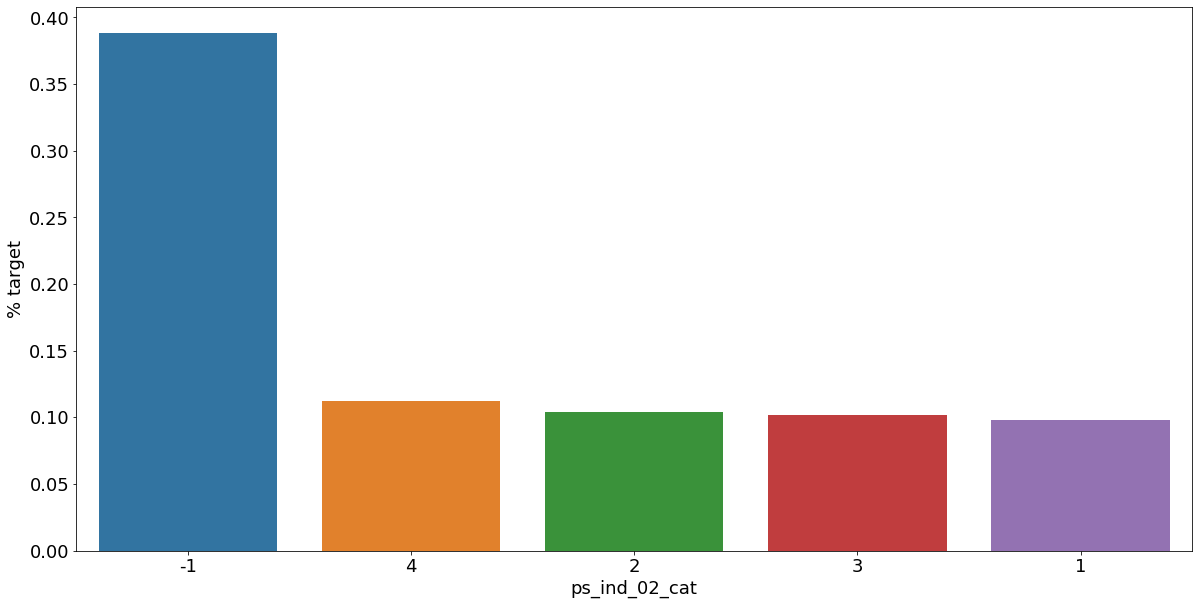

<Figure size 432x288 with 0 Axes>

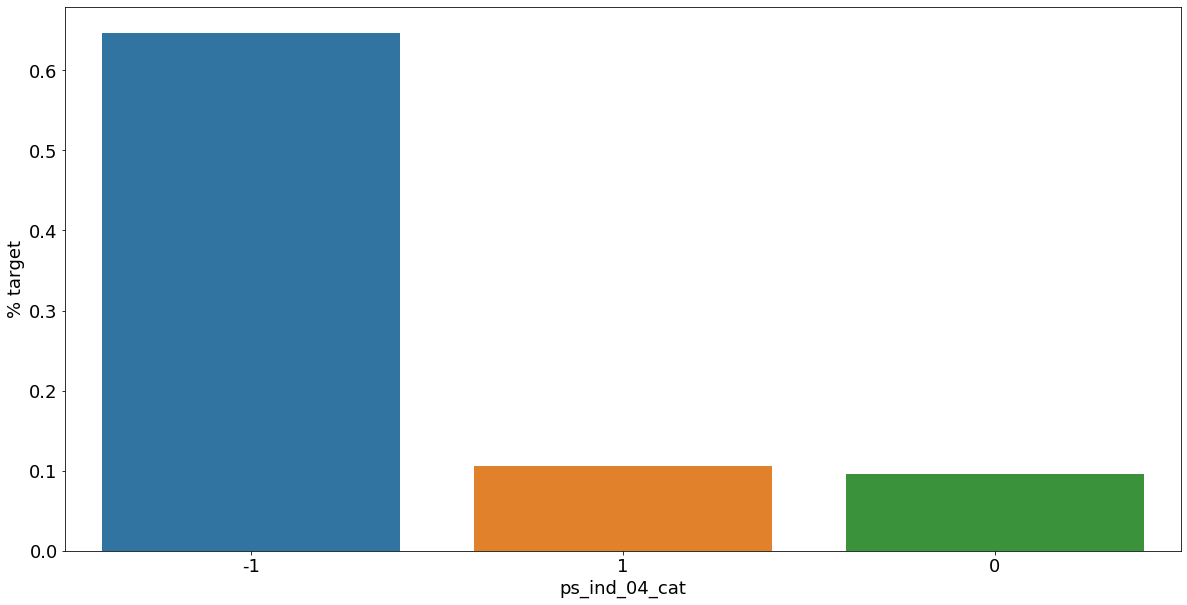

<Figure size 432x288 with 0 Axes>

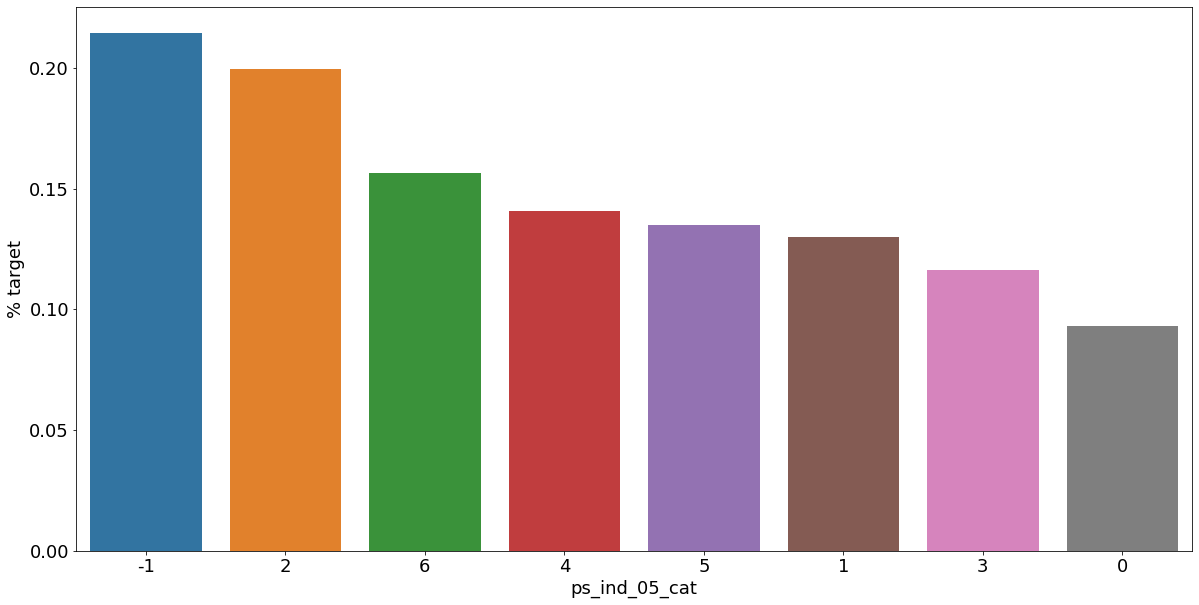

<Figure size 432x288 with 0 Axes>

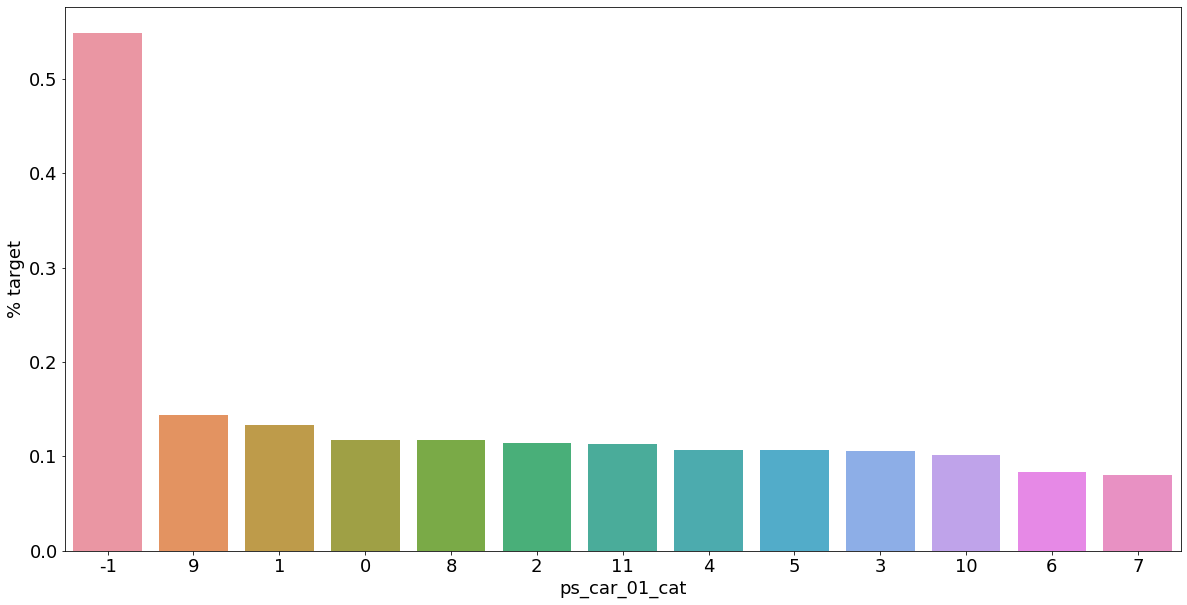

<Figure size 432x288 with 0 Axes>

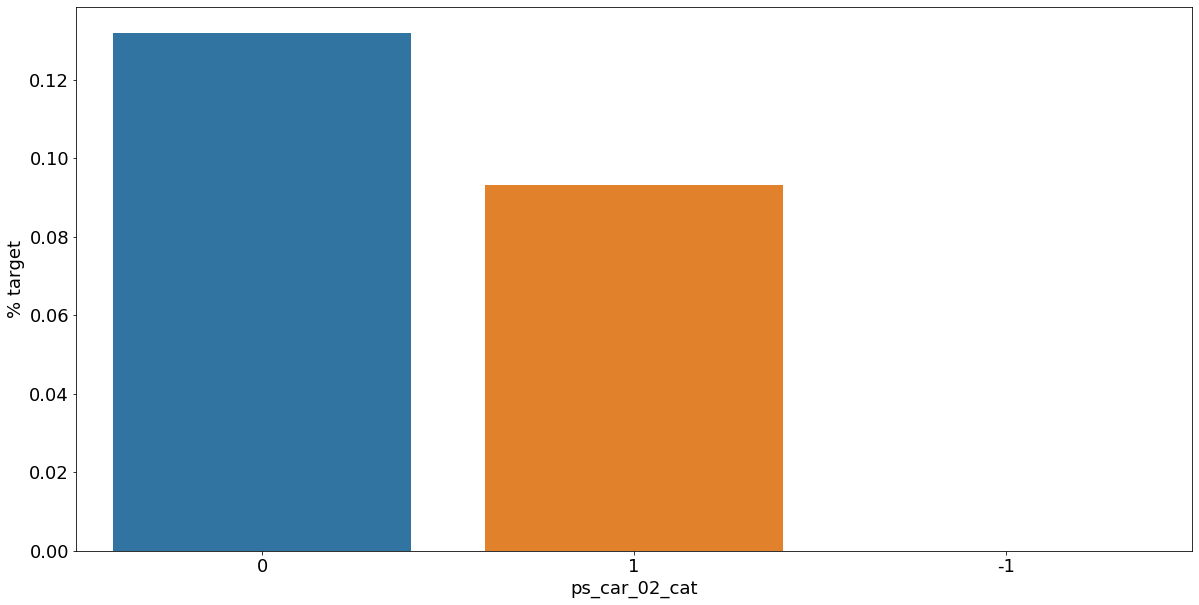

<Figure size 432x288 with 0 Axes>

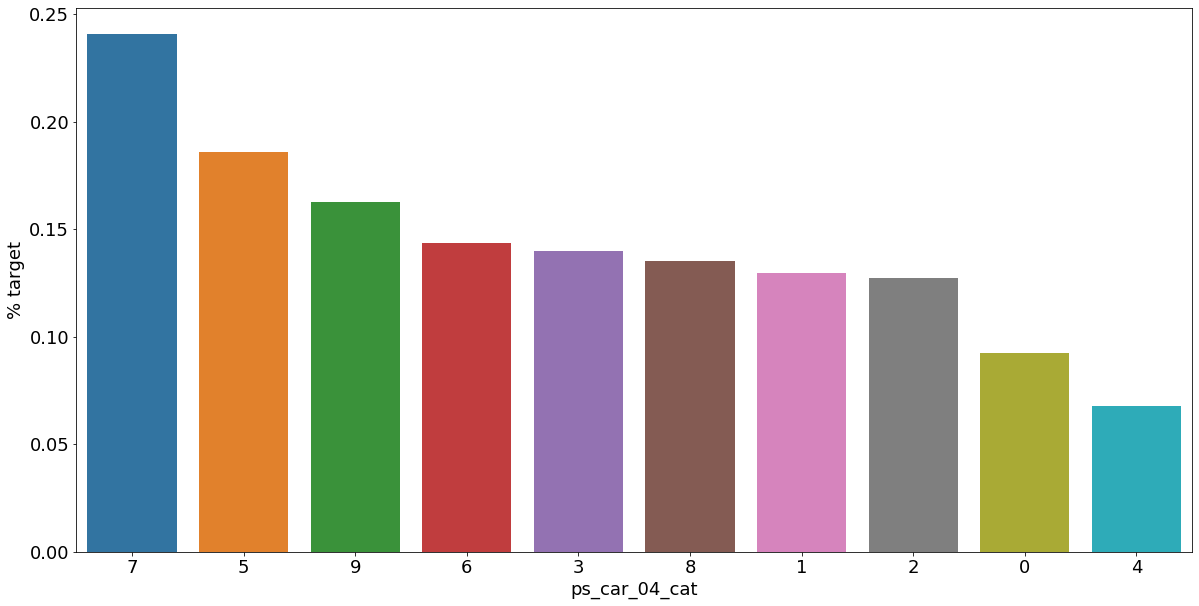

<Figure size 432x288 with 0 Axes>

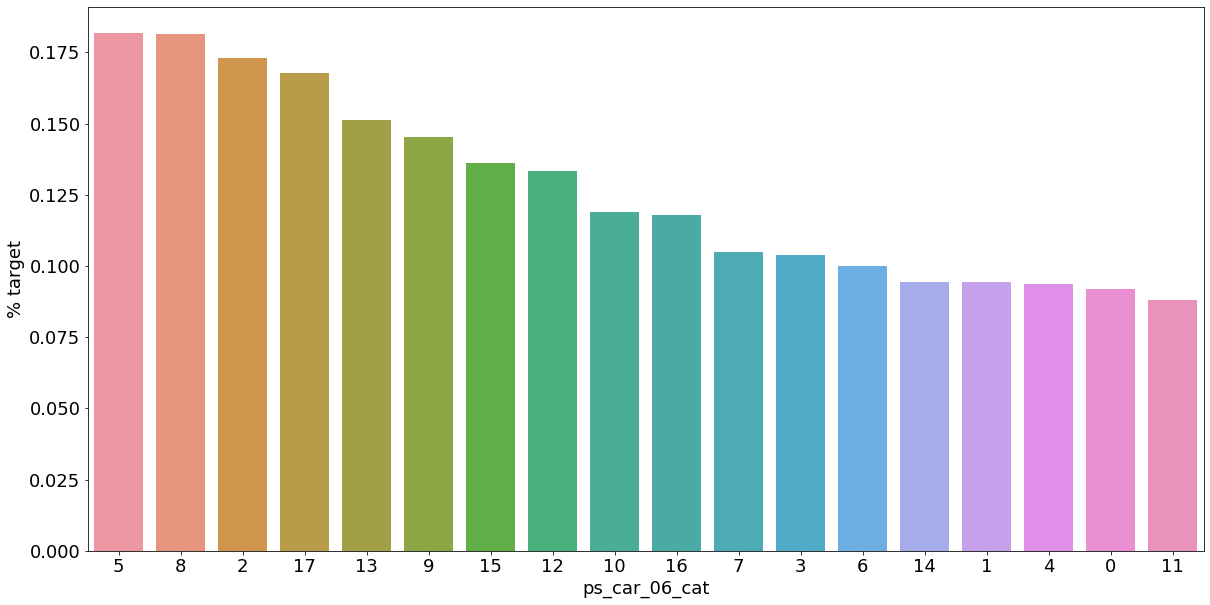

<Figure size 432x288 with 0 Axes>

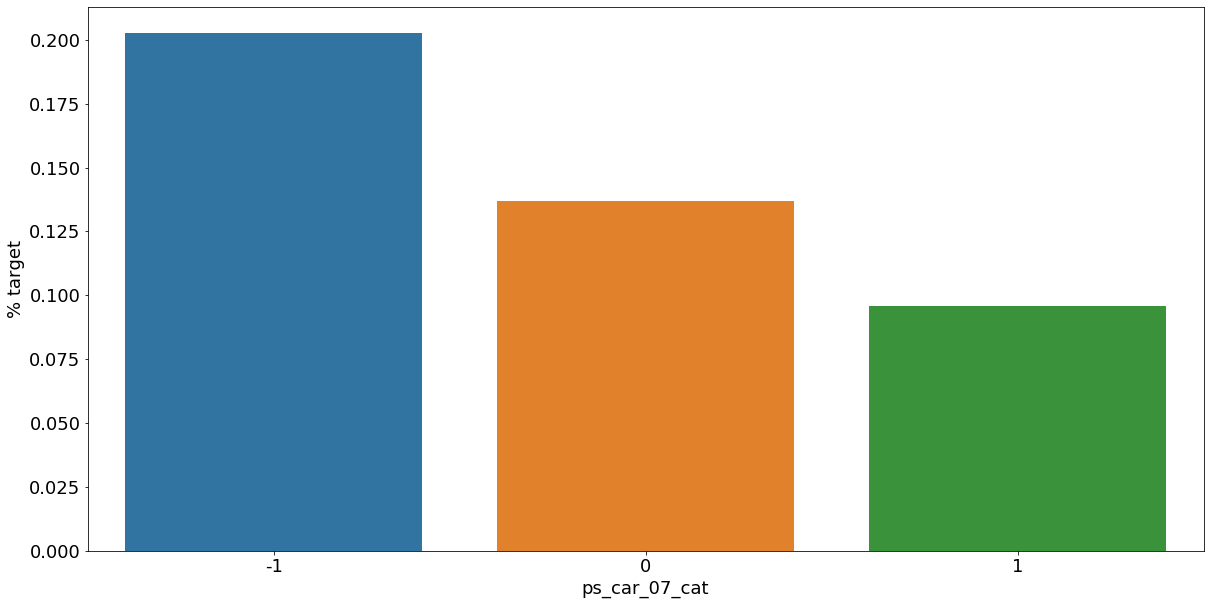

<Figure size 432x288 with 0 Axes>

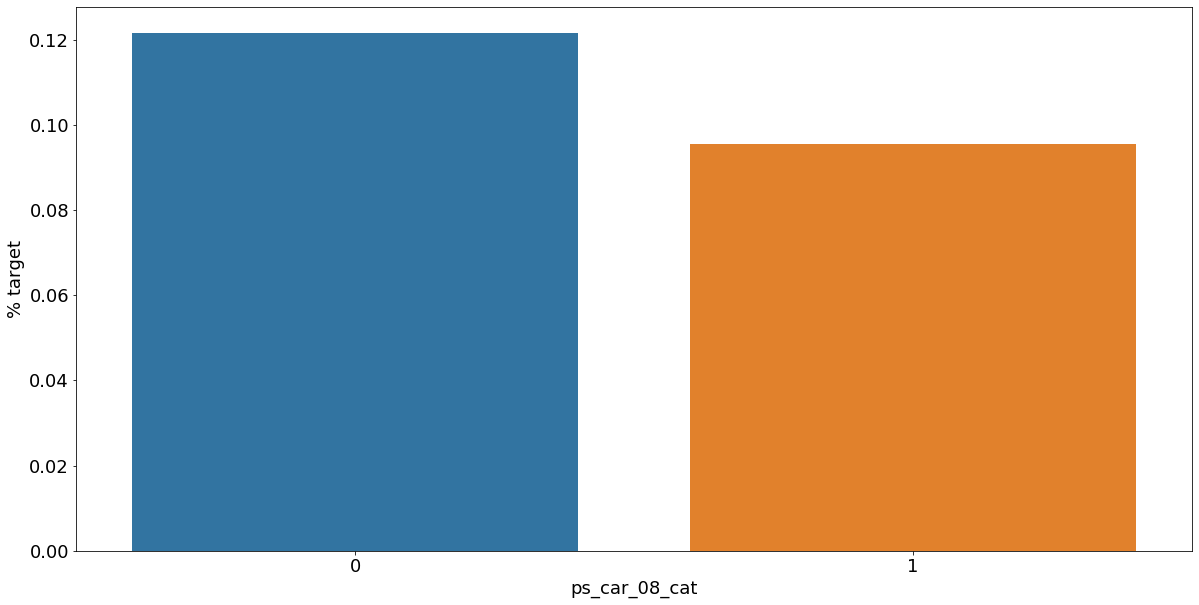

<Figure size 432x288 with 0 Axes>

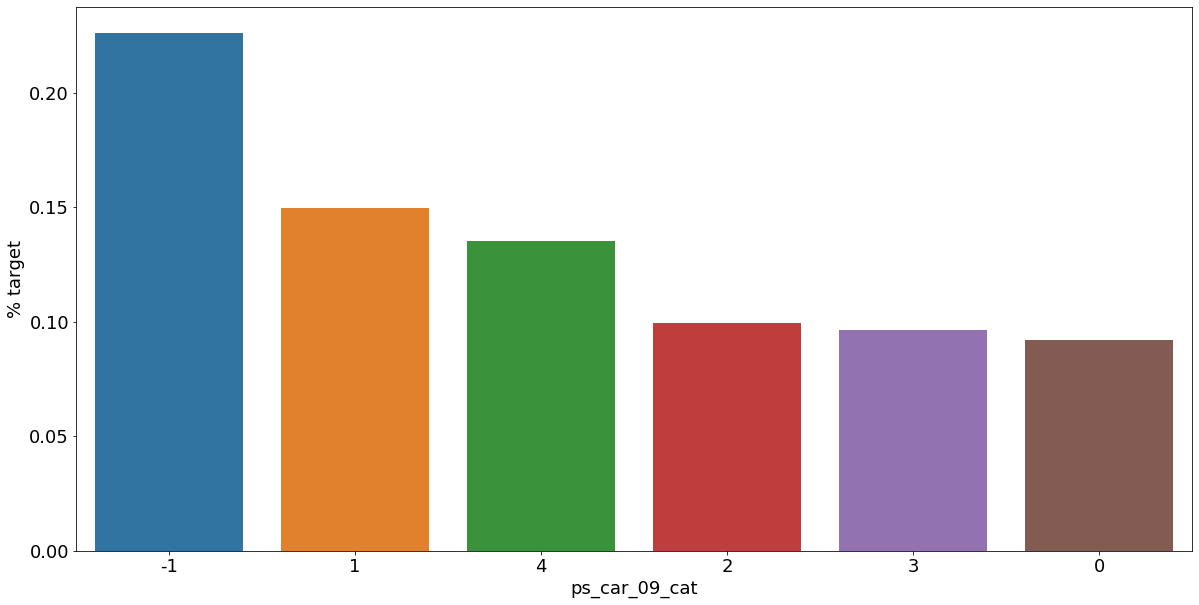

<Figure size 432x288 with 0 Axes>

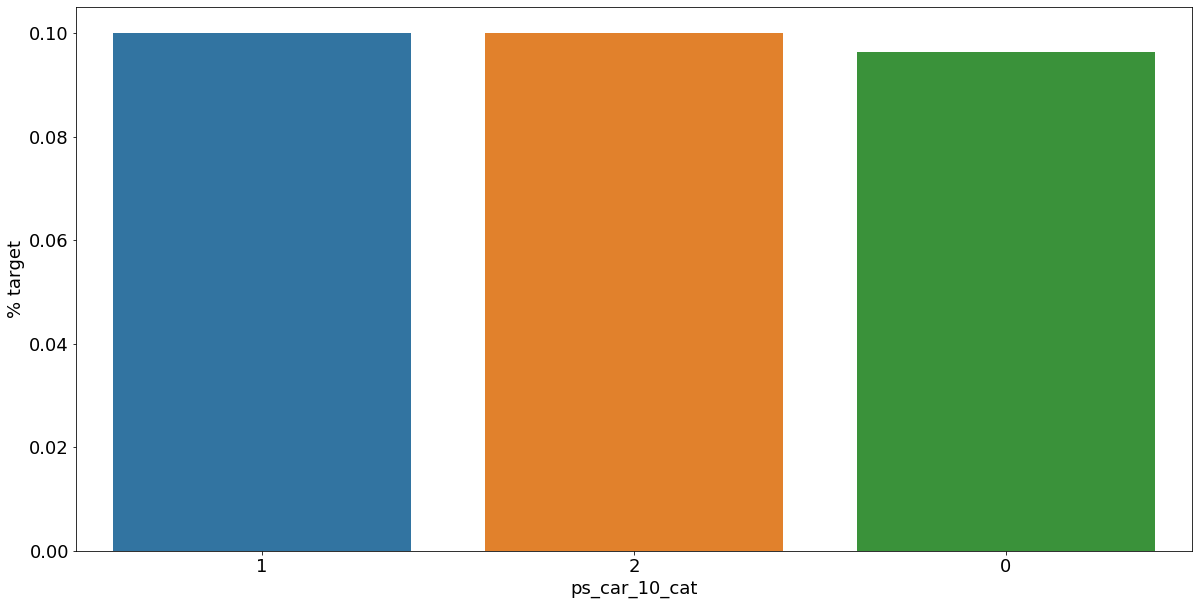

In [162]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

결측값이 있는 변수에서 알 수 있듯이 결측값을 모드로 대체하는 대신 별도의 범주 값으로 유지하는 것이 좋습니다. 누락된 가치가 있는 고객은 보험금을 청구할 확률이 훨씬 더 높은 것(경우에 따라서는 훨씬 낮은 것)으로 나타납니다.

#### Interval variables

구간 변수 간의 상관 관계를 확인합니다. 열 지도는 변수 간의 상관 관계를 시각화하는 좋은 방법입니다. 아래 코드는 Michael Waskom의 예를 기반으로 합니다

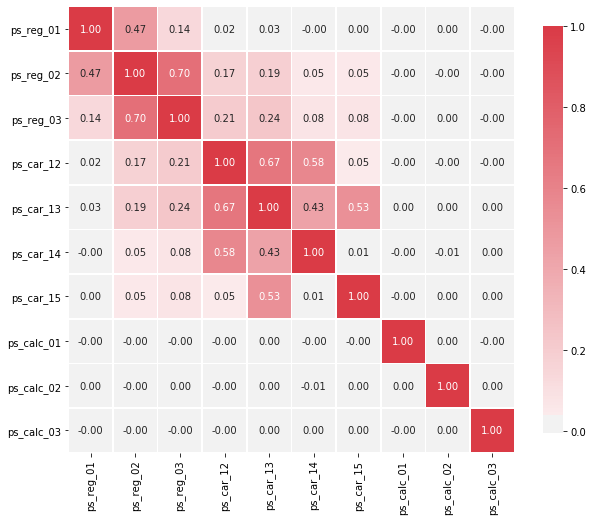

In [163]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    
    fig,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations,cmap=cmap, vmax=1.0, center=0, fmt='.2f',
               square=True, linewidth=.5, annot=True, cbar_kws={'shrink':.75})
    plt.show()

v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

변수 사이에는 다음과 같은 강한 상관 관계가 있습니다.

- ps_reg_02 와 ps_reg_03 (0.7)
- ps_car_12 와 ps_car13 (0.67)
- ps_car_12 와 ps_car14 (0.58)
- ps_car_13 와 ps_car15 (0.67)

Seaborn에는 변수 간의 (선형) 관계를 시각화하는 데 유용한 플롯이 있습니다. pairplot을 사용하여 변수 간의 관계를 시각화할 수 있습니다. 그러나 열 지도에는 이미 제한된 수의 상관 변수가 표시되었기 때문에 각 상관 변수를 개별적으로 살펴보겠습니다.

참고: 프로세스 속도를 높이기 위해 열차 데이터의 샘플을 채취합니다.

In [164]:
s = train.sample(frac=0.1)

#### ps_reg_02 와 ps_reg_03
회귀선이 보여주듯이 이러한 변수 사이에는 선형 관계가 있습니다. 색조 매개 변수 덕분에 목표값=0과 목표값=1에 대한 회귀선이 동일함을 알 수 있습니다

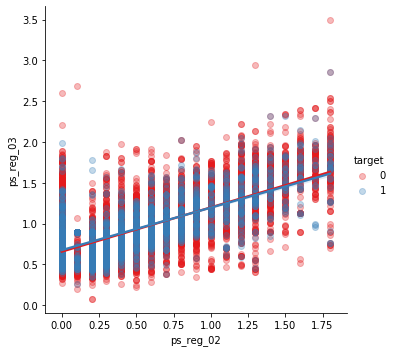

In [166]:
sns.lmplot(x='ps_reg_02',y='ps_reg_03',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 와 ps_car_13

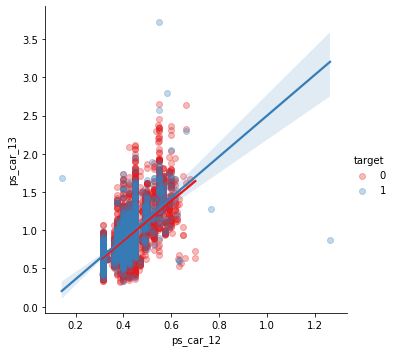

In [168]:
sns.lmplot(x='ps_car_12',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_12 와 ps_car_14

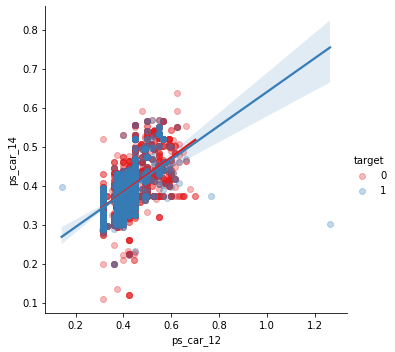

In [169]:
sns.lmplot(x='ps_car_12',y='ps_car_14',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

#### ps_car_13 과 ps_car_15

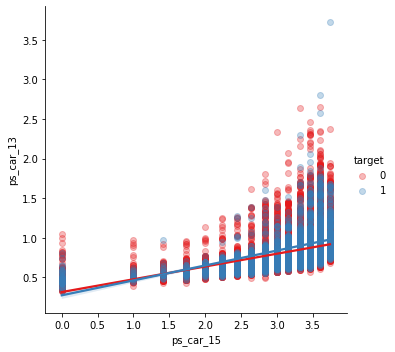

In [170]:
sns.lmplot(x='ps_car_15',y='ps_car_13',data=s,hue='target',palette='Set1',scatter_kws={'alpha':0.3})
plt.show()

우리는 치수를 줄이기 위해 변수에 대한 주성분 분석(PCA)을 수행할 수 있다. 모든 주의 청구 심각도 경쟁에서 나는 그것을 하기 위해 이 커널을 만들었다. 하지만 상관 변수의 수가 적은 만큼, 우리는 모델이 무거운 것을 들게 할 것입니다.

### Checking the correlations between ordinal variables

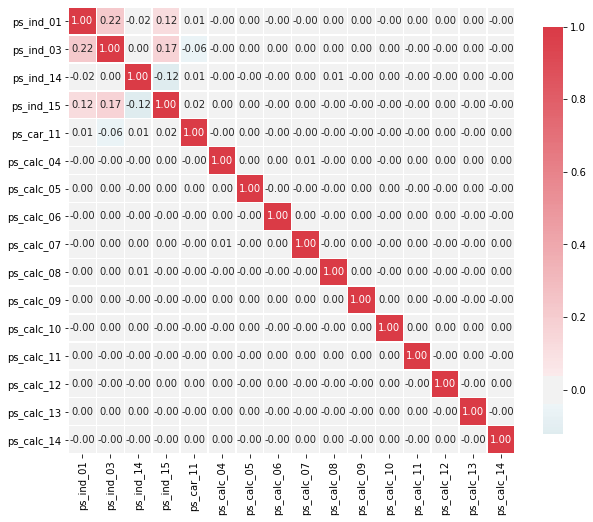

In [171]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

순서형 변수의 경우 많은 상관 관계를 볼 수 없습니다. 반면, 목표값으로 그룹화할 때 분포가 어떻게 되는지 확인할 수 있습니다.


### Feature engineering

#### Creating dummy variables

범주형 변수의 값은 순서 또는 크기를 나타내지 않습니다. 예를 들어, 카테고리 2는 카테고리 1의 두 배가 아닙니다. 따라서 우리는 그것을 다루기 위해 더미 변수를 만들 수 있다. 이 정보는 원래 변수의 범주에 대해 생성된 다른 더미 변수에서 파생될 수 있으므로 첫 번째 더미 변수를 삭제한다.

In [172]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train,columns=v,drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


따라서 더미 변수를 생성하면 교육 세트에 52개의 변수가 추가됩니다.
#### Creating interaction variables

In [173]:
v = meta[(meta.level == 'interval')&(meta.keep)].index
poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]),columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True) 

print('Before creating interactions we have {} variavles in train'.format(train.shape[1]))
train = pd.concat([train,interactions],axis=1)
print('After creating interactions we have {} variavles in train'.format(train.shape[1]))

Before creating interactions we have 109 variavles in train
After creating interactions we have 164 variavles in train


### Feature selection
#### Removing features with low or zero variance

개인적으로, 나는 분류기 알고리즘이 유지할 기능을 선택하도록 하는 것을 선호한다. 하지만 우리가 스스로 할 수 있는 일이 하나 있습니다. 즉, 분산이 없거나 매우 낮은 형상을 제거하는 것입니다. Sklearn은 이를 위한 편리한 방법 : : 분산임계값(VarianceThreshold)을 가지고 있습니다. 기본적으로 분산이 0인 형상을 제거한다. 이전 단계에서 무차분 변수가 없는 것을 보았기 때문에 이 경기는 적용되지 않을 것이다. 그러나 1% 미만의 분산이 있는 형상을 제거한다면 31개의 변수를 제거할 것이다.

In [174]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1))

f = np.vectorize(lambda x : not x)

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

27 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


분산에 따라 선택할 경우 변수가 많이 손실됩니다. 하지만 변수가 많지 않기 때문에 분류기가 선택하도록 하겠습니다. 변수가 더 많은 데이터 집합의 경우 처리 시간을 줄일 수 있습니다.

Sklearn에는 다른 기능 선택 방법도 함께 제공됩니다. 다음 방법 중 하나는 다른 분류기가 최적의 기능을 선택하고 이러한 기능을 계속하도록 하는 SelectFrom Model입니다. 아래에서 랜덤 포레스트를 사용하는 방법을 보여드리겠습니다.

#### Selecting features with a Random Forest and SelectFromModel

여기서는 임의 포리스트의 기능 중요도에 따라 피쳐 선택을 기준으로 합니다. 그런 다음 Sklearn의 SelectFrom Model을 사용하여 유지할 변수 수를 지정할 수 있습니다. 기능 중요도 수준에 대한 임계값을 수동으로 설정할 수 있습니다. 하지만 상위 50%의 최적 변수를 선택하기만 하면 됩니다.

    아래 셀의 코드는 세바스찬 라슈카의 깃허브포에서 빌린 것이다. 이 레포에는 그의 저서 파이썬 머신 러닝의 코드 샘플이 포함되어 있는데, 이것은 반드시 읽어야 할 책이다.

In [175]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

#2회차부터는 실행결과를 빠르게 하기 위해 n_estimator값을 100으로 줄였습니다.
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_13^2                    0.018160
 2) ps_car_13                      0.017638
 3) ps_car_13 ps_car_14            0.017519
 4) ps_car_12 ps_car_13            0.017496
 5) ps_reg_03 ps_car_13            0.017346
 6) ps_car_13 ps_car_15            0.017033
 7) ps_reg_01 ps_car_13            0.017021
 8) ps_reg_03 ps_car_14            0.016429
 9) ps_reg_03 ps_car_12            0.015605
10) ps_car_14 ps_car_15            0.015426
11) ps_reg_03 ps_car_15            0.015223
12) ps_reg_01 ps_reg_03            0.014916
13) ps_car_13 ps_calc_02           0.014716
14) ps_car_13 ps_calc_01           0.014672
15) ps_car_13 ps_calc_03           0.014663
16) ps_reg_02 ps_car_13            0.014614
17) ps_reg_01 ps_car_14            0.014521
18) ps_reg_03^2                    0.014355
19) ps_reg_03                      0.014304
20) ps_reg_03 ps_calc_01           0.013877
21) ps_reg_03 ps_calc_03           0.013794
22) ps_calc_10                     0.013756
23) ps_car_14 ps_calc_02        

SelectFrom Model을 사용하면 사용할 프리핏 분류기와 기능 중요도에 대한 임계값을 지정할 수 있습니다. get_support 방법을 사용하면 열차 데이터의 변수 수를 제한할 수 있습니다.

In [176]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


In [177]:
train = train[selected_vars + ['target']]

### Feature scaling
앞에서 언급했듯이, 우리는 교육 데이터에 표준 확장을 적용할 수 있다. 일부 분류기는 이 작업이 완료되면 성능이 향상됩니다.

In [178]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'],axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])